# OpenUBI plan

A UBI plan which minimizes the net losses per tax unit.

## Setup

In [176]:
import taxcalc as tc
import taxcalc_helpers as tch
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [3]:
tc.__version__

'0.20.1'

### Settings

In [4]:
sns.set_style('white')
DPI = 300
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.

In [8]:
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

# Use Seaborn's default color palette.
# https://stackoverflow.com/q/48958426/1840471 for reproducibility.
sns.set_palette(sns.color_palette())

In [6]:
# Show one decimal in tables.
pd.set_option('precision', 2)

## Data

In [18]:
CG_RATES = [0., 0.15, 0.2]
II_RATES = [0.1, 0.12, 0.22, 0.24, 0.32, 0.35, 0.37]

In [19]:
reform_eliminate_bottom_bracket = {
    2018: {
        '_CG_rt1': [CG_RATES[1]],
        '_AMT_CG_rt1': [CG_RATES[1]],
        '_II_rt1': [II_RATES[1]],
        '_PT_rt1': [II_RATES[1]]
    }
}

In [21]:
reform_eliminate_bottom_2bracket = {
    2018: {
        '_CG_rt1': [CG_RATES[2]],
        '_AMT_CG_rt1': [CG_RATES[2]],
        '_II_rt1': [II_RATES[2]],
        '_PT_rt1': [II_RATES[2]],
        '_CG_rt2': [CG_RATES[2]],
        '_AMT_CG_rt2': [CG_RATES[2]],
        '_II_rt2': [II_RATES[2]],
        '_PT_rt2': [II_RATES[2]]
    }
}

In [25]:
reform_eliminate_bottom_3bracket = {
    2018: {
        '_CG_rt1': [CG_RATES[2]],
        '_AMT_CG_rt1': [CG_RATES[2]],
        '_II_rt1': [II_RATES[3]],
        '_PT_rt1': [II_RATES[3]],
        '_CG_rt2': [CG_RATES[2]],
        '_AMT_CG_rt2': [CG_RATES[2]],
        '_II_rt2': [II_RATES[3]],
        '_PT_rt2': [II_RATES[3]],
        '_II_rt3': [II_RATES[3]],
        '_PT_rt3': [II_RATES[3]],
    }
}

In [28]:
reform_eliminate_bottom_4bracket = {
    2018: {
        '_CG_rt1': [CG_RATES[2]],
        '_AMT_CG_rt1': [CG_RATES[2]],
        '_II_rt1': [II_RATES[4]],
        '_PT_rt1': [II_RATES[4]],
        '_CG_rt2': [CG_RATES[2]],
        '_AMT_CG_rt2': [CG_RATES[2]],
        '_II_rt2': [II_RATES[4]],
        '_PT_rt2': [II_RATES[4]],
        '_II_rt3': [II_RATES[4]],
        '_PT_rt3': [II_RATES[4]],
        '_II_rt4': [II_RATES[4]],
        '_PT_rt4': [II_RATES[4]]
    }
}

In [40]:
reform_eliminate_bottom_5bracket = {
    2018: {
        '_CG_rt1': [CG_RATES[2]],
        '_AMT_CG_rt1': [CG_RATES[2]],
        '_II_rt1': [II_RATES[5]],
        '_PT_rt1': [II_RATES[5]],
        '_CG_rt2': [CG_RATES[2]],
        '_AMT_CG_rt2': [CG_RATES[2]],
        '_II_rt2': [II_RATES[5]],
        '_PT_rt2': [II_RATES[5]],
        '_II_rt3': [II_RATES[5]],
        '_PT_rt3': [II_RATES[5]],
        '_II_rt4': [II_RATES[5]],
        '_PT_rt4': [II_RATES[5]],
        '_II_rt5': [II_RATES[5]],
        '_PT_rt5': [II_RATES[5]]
    }
}

In [41]:
reform_eliminate_bottom_6bracket = {
    2018: {
        '_CG_rt1': [CG_RATES[2]],
        '_AMT_CG_rt1': [CG_RATES[2]],
        '_II_rt1': [II_RATES[6]],
        '_PT_rt1': [II_RATES[6]],
        '_CG_rt2': [CG_RATES[2]],
        '_AMT_CG_rt2': [CG_RATES[2]],
        '_II_rt2': [II_RATES[6]],
        '_PT_rt2': [II_RATES[6]],
        '_II_rt3': [II_RATES[6]],
        '_PT_rt3': [II_RATES[6]],
        '_II_rt4': [II_RATES[6]],
        '_PT_rt4': [II_RATES[6]],
        '_II_rt5': [II_RATES[6]],
        '_PT_rt5': [II_RATES[6]],
        '_II_rt6': [II_RATES[6]],
        '_PT_rt6': [II_RATES[6]]
    }
}

In [155]:
reform_2017_std = {
    2018: {
        '_STD': [[6350.0, 12700.0, 6350.0, 9350.0, 12700.0]]
    }
}

In [180]:
reform_snap_repeal = {
    2018: {
        '_BEN_snap_repeal': [True],
        '_BEN_tanf_repeal': [True],
        '_BEN_wic_repeal': [True],
        '_BEN_ssi_repeal': [True]
    }
}

In [11]:
reform_no_medicaid_medicare = {
    2018: {
        "_BEN_mcaid_repeal": [True],
        "_BEN_mcare_repeal": [True]
    }
}

In [207]:
pol = tc.Policy()
pol.implement_reform(reform_no_medicaid_medicare)

In [14]:
base = tch.calc_df(records=tc.Records.cps_constructor(),
                   policy=copy.deepcopy(pol),
                   year=2018,
                   group_vars=['XTOT', 'nu18', 'aftertax_income'],
                   metric_vars=['aftertax_income', 'XTOT', 'nu18'])

In [202]:
ubi1 = tch.calc_df(records=tc.Records.cps_constructor(),
                   policy=copy.deepcopy(pol),
                   reform=reform_eliminate_bottom_bracket,
                   year=2018,
                   group_vars=['XTOT', 'nu18', 'aftertax_income'],
                   metric_vars=['aftertax_income', 'XTOT', 'nu18'])

In [22]:
ubi2 = tch.calc_df(records=tc.Records.cps_constructor(),
                   policy=copy.deepcopy(pol),
                   reform=reform_eliminate_bottom_2bracket,
                   year=2018,
                   group_vars=['XTOT', 'nu18', 'aftertax_income'],
                   metric_vars=['aftertax_income', 'XTOT', 'nu18'])

In [26]:
ubi3 = tch.calc_df(records=tc.Records.cps_constructor(),
                   policy=copy.deepcopy(pol),
                   reform=reform_eliminate_bottom_3bracket,
                   year=2018,
                   group_vars=['XTOT', 'nu18', 'aftertax_income'],
                   metric_vars=['aftertax_income', 'XTOT', 'nu18'])

In [29]:
ubi4 = tch.calc_df(records=tc.Records.cps_constructor(),
                   policy=copy.deepcopy(pol),
                   reform=reform_eliminate_bottom_4bracket,
                   year=2018,
                   group_vars=['XTOT', 'nu18', 'aftertax_income'],
                   metric_vars=['aftertax_income', 'XTOT', 'nu18'])

In [42]:
ubi5 = tch.calc_df(records=tc.Records.cps_constructor(),
                   policy=copy.deepcopy(pol),
                   reform=reform_eliminate_bottom_5bracket,
                   year=2018,
                   group_vars=['XTOT', 'nu18', 'aftertax_income'],
                   metric_vars=['aftertax_income', 'XTOT', 'nu18'])

In [43]:
ubi6 = tch.calc_df(records=tc.Records.cps_constructor(),
                   policy=copy.deepcopy(pol),
                   reform=reform_eliminate_bottom_6bracket,
                   year=2018,
                   group_vars=['XTOT', 'nu18', 'aftertax_income'],
                   metric_vars=['aftertax_income', 'XTOT', 'nu18'])

In [172]:
std2017 = tch.calc_df(records=tc.Records.cps_constructor(),
                      policy=copy.deepcopy(pol),
                      reform=reform_2017_std,
                      year=2018,
                      group_vars=['XTOT', 'nu18', 'aftertax_income'],
                      metric_vars=['aftertax_income', 'XTOT', 'nu18'])

In [181]:
snap_repeal = tch.calc_df(records=tc.Records.cps_constructor(),
                         policy=copy.deepcopy(pol),
                         reform=reform_snap_repeal,
                         year=2018,
                         group_vars=['XTOT', 'nu18', 'aftertax_income'],
                         metric_vars=['aftertax_income', 'XTOT', 'nu18'])

#### Combinations

In [208]:
pol_nb = copy.deepcopy(pol)
pol_nb.implement_reform(reform_snap_repeal)

In [209]:
ubi1_nb = tch.calc_df(records=tc.Records.cps_constructor(),
                      policy=copy.deepcopy(pol_nb),
                      reform=reform_eliminate_bottom_bracket,
                      year=2018,
                      group_vars=['XTOT', 'nu18', 'aftertax_income'],
                      metric_vars=['aftertax_income', 'XTOT', 'nu18'])

In [211]:
ubi2_nb = tch.calc_df(records=tc.Records.cps_constructor(),
                      policy=copy.deepcopy(pol_nb),
                      reform=reform_eliminate_bottom_2bracket,
                      year=2018,
                      group_vars=['XTOT', 'nu18', 'aftertax_income'],
                      metric_vars=['aftertax_income', 'XTOT', 'nu18'])

#### Total revenue

In [182]:
snap_repeal.aftertax_income_m.sum() / 1e3

10304.638623229459

In [16]:
base.aftertax_income_m.sum() / 1e3

10451.984854785078

In [17]:
ubi.aftertax_income_m.sum() / 1e3

10409.448299002657

In [23]:
ubi2.aftertax_income_m.sum() / 1e3

9940.437698470332

In [27]:
ubi3.aftertax_income_m.sum() / 1e3

9819.186626261906

In [30]:
ubi4.aftertax_income_m.sum() / 1e3

9281.660643789925

In [44]:
ubi5.aftertax_income_m.sum() / 1e3

9076.295573693627

In [45]:
ubi6.aftertax_income_m.sum() / 1e3

8935.862676622963

In [173]:
std2017.aftertax_income_m.sum() / 1e3

10292.408392530562

In [51]:
tch.add_weighted_quantiles(base, 'aftertax_income')

In [50]:
ubi.head()

,aftertax_income,nu18,s006,XTOT,s006_m,aftertax_income_m,XTOT_m,nu18_m
RECID,,,,,,,,
1,41897.74,0.0,239.46,2.0,2.39e-04,10.03,4.79e-04,0.00e+00
2,20460.86,2.0,202.59,3.0,2.03e-04,4.15,6.08e-04,4.05e-04
3,44503.50,0.0,255.35,1.0,2.55e-04,11.36,2.55e-04,0.00e+00
4,24329.97,1.0,178.36,2.0,1.78e-04,4.34,3.57e-04,1.78e-04
5,35802.21,0.0,270.80,2.0,2.71e-04,9.70,5.42e-04,0.00e+00


In [55]:
(ubi6.aftertax_income < 0).sum()

161

In [197]:
def rnubi(base, ubi):
    base.aftertax_income.clip_lower(0, inplace=True)
    base.aftertax_income_m.clip_lower(0, inplace=True)
    ubi.aftertax_income.clip_lower(0, inplace=True)
    ubi.aftertax_income_m.clip_lower(0, inplace=True)
    ubi_amount = (base.aftertax_income_m.sum() - ubi.aftertax_income_m.sum()) / base.XTOT_m.sum()
    ubi_premerge = ubi[['aftertax_income']]
    ubi_premerge.columns = ['afti_ubi']
    res = base.join(ubi_premerge)
    res['afti_ubi'] = res.afti_ubi + (ubi_amount * res.XTOT)
    res['afti_ubi_m'] = res.afti_ubi * res.s006_m
    res['loss_m'] = np.maximum(res.aftertax_income_m - res.afti_ubi_m, 0)
    res['pct_loss'] = res.loss_m / res.aftertax_income_m
    print('UBI: ${:,.0f}\n'.format(ubi_amount) + 
          'Total losses: ${:,.0f}B'.format(res.loss_m.sum() / 1e3))
    return res

In [198]:
def rnubi_decileplot(basedf, ubidf):
    df = rnubi(basedf, ubidf)
    diff1 = df.groupby('aftertax_income_decile')['aftertax_income_m', 'afti_ubi_m', 'loss_m'].sum()
    diff1['afti_diff'] = diff1.afti_ubi_m - diff1.aftertax_income_m
    diff1['afti_pct_diff'] = diff1.afti_diff / diff1.aftertax_income_m
    diff1['pct_loss'] = diff1.loss_m / diff1.aftertax_income_m
    ax = diff1.afti_pct_diff.plot()
    sns.despine(left=True, bottom=True)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, _: '{:.1%}'.format(y)))
    ax.grid(color='#f5f5f5', axis='y')
    plt.axhline(y=0, c='gray', linestyle='dashed', linewidth=0.3)
    ax.set(xlabel=
           'Decile of income after taxes and transfers (baseline)',
           ylabel='Change in after-tax income')
    plt.title('UBI reform', loc='left')
    plt.show()
    
    ax = diff1.loss_m.plot()
    sns.despine(left=True, bottom=True)
#     ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
#         lambda y, _: '{:.1%}'.format(y)))
    ax.grid(color='#f5f5f5', axis='y')
    plt.axhline(y=0, c='gray', linestyle='dashed', linewidth=0.3)
    ax.set(xlabel=
           'Decile of income after taxes and transfers (baseline)',
           ylabel='Net losses ($M)')
    plt.title('UBI reform', loc='left')
    plt.show()
    
    ax = diff1.pct_loss.plot()
    sns.despine(left=True, bottom=True)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
        lambda y, _: '{:.1%}'.format(y)))
    ax.grid(color='#f5f5f5', axis='y')
    plt.axhline(y=0, c='gray', linestyle='dashed', linewidth=0.3)
    ax.set(xlabel=
           'Decile of income after taxes and transfers (baseline)',
           ylabel='Net losses / after-tax income')
    plt.title('UBI reform', loc='left')
    plt.show()

In [199]:
rnubi(base, snap_repeal).sort_values('loss_m').tail()

UBI: $440
Total losses: $123B


,aftertax_income,nu18,s006,XTOT,s006_m,aftertax_income_m,XTOT_m,nu18_m,aftertax_income_percentile_exact,aftertax_income_percentile,aftertax_income_2percentile,aftertax_income_ventile,aftertax_income_decile,aftertax_income_quintile,aftertax_income_quartile,afti_ubi,afti_ubi_m,loss_m,pct_loss
RECID,,,,,,,,,,,,,,,,,,,
260778,56214.48,6.0,1596.50,7.0,1.60e-03,89.75,1.12e-02,9.58e-03,62.69,63,64,65,7,4,3,13866.96,22.14,67.61,0.75
242892,84600.64,0.0,1937.99,2.0,1.94e-03,163.96,3.88e-03,0.00e+00,78.00,78,78,80,8,4,4,47306.21,91.68,72.28,0.44
105120,99662.80,7.0,905.99,8.0,9.06e-04,90.29,7.25e-03,6.34e-03,83.39,84,84,85,9,5,4,11357.06,10.29,80.00,0.89
200915,79796.27,6.0,1694.44,7.0,1.69e-03,135.21,1.19e-02,1.02e-02,76.03,77,78,80,8,4,4,24288.75,41.16,94.05,0.70
191298,198822.01,9.0,1138.08,11.0,1.14e-03,226.28,1.25e-02,1.02e-02,96.80,97,98,100,10,5,4,89371.62,101.71,124.56,0.55


UBI: $1,969
Total losses: $231B


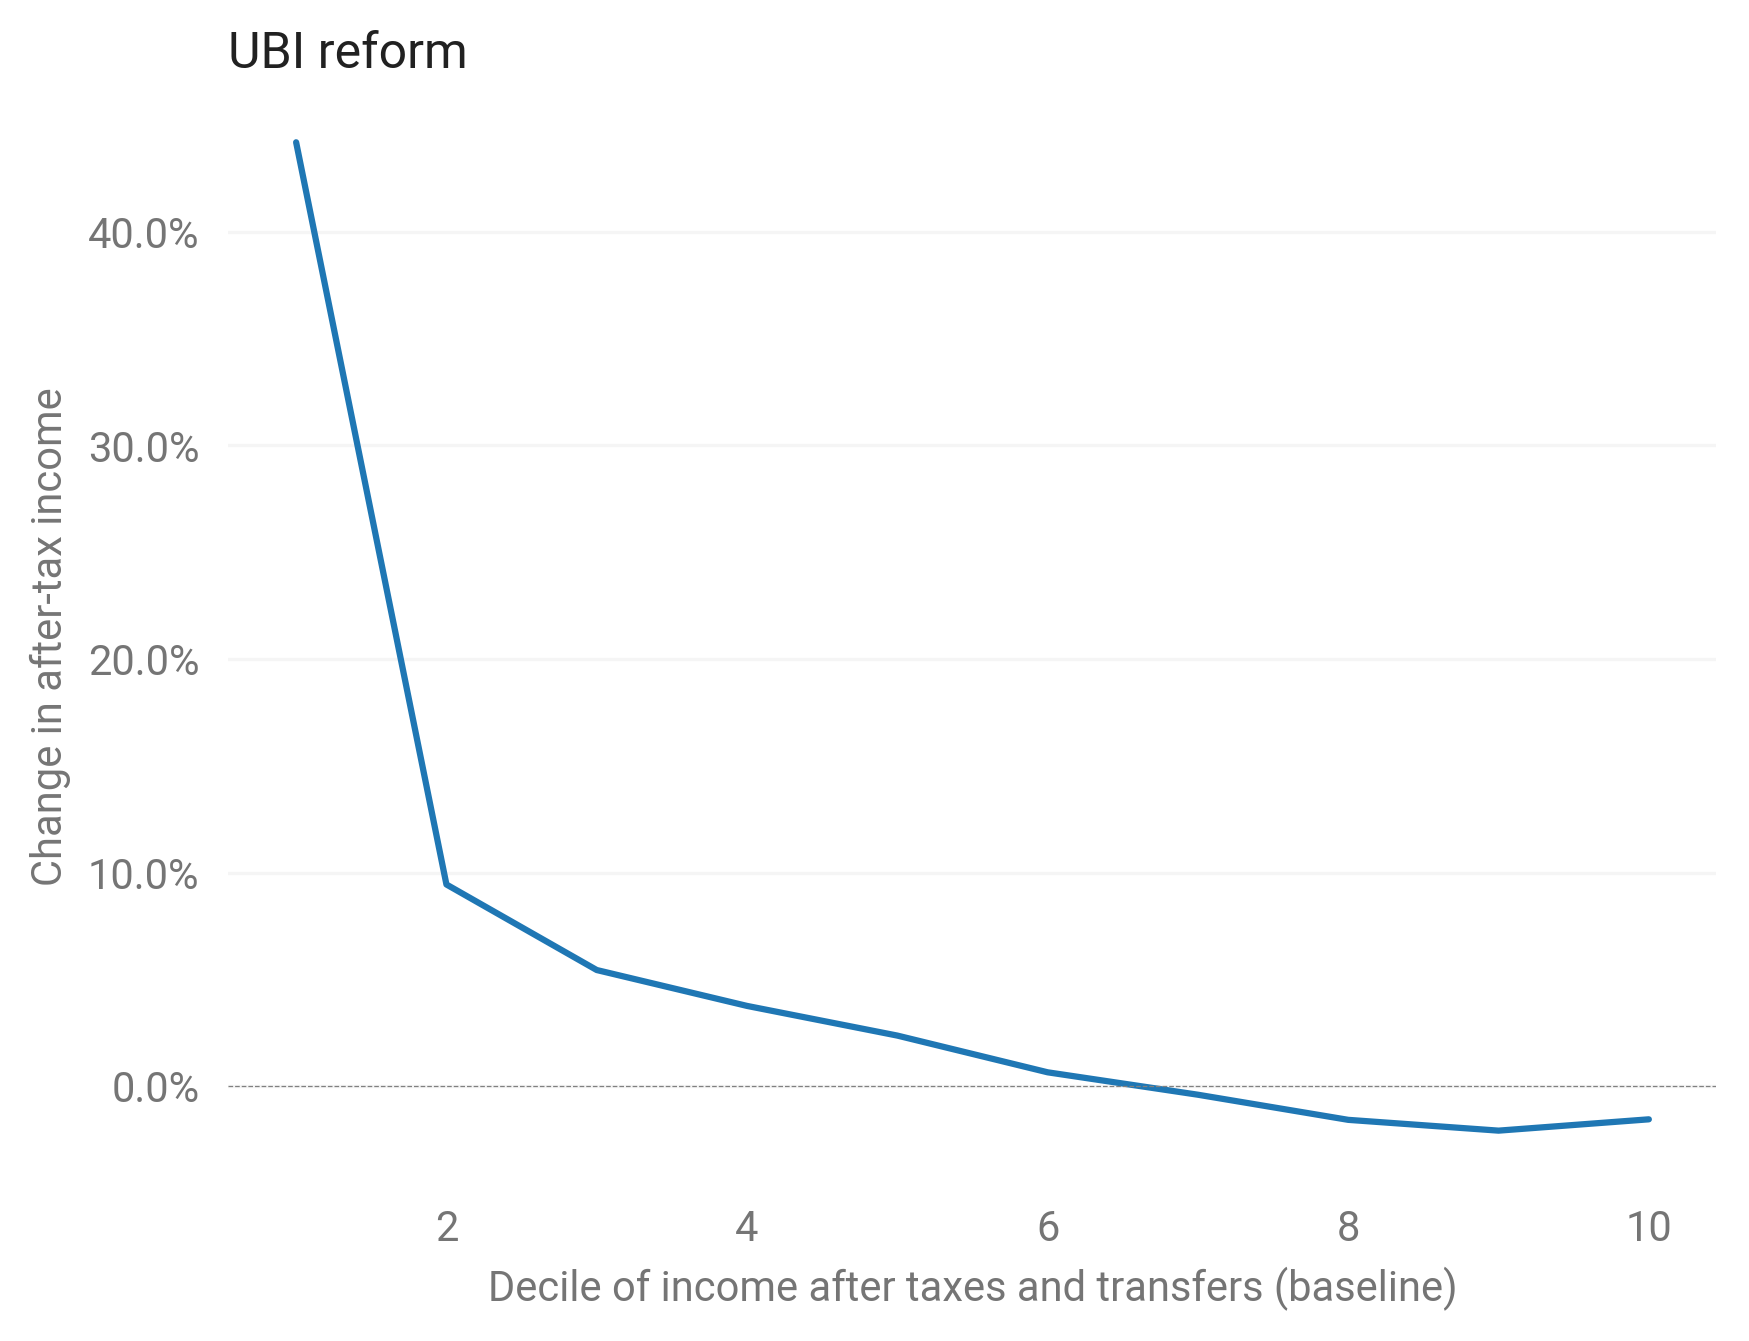

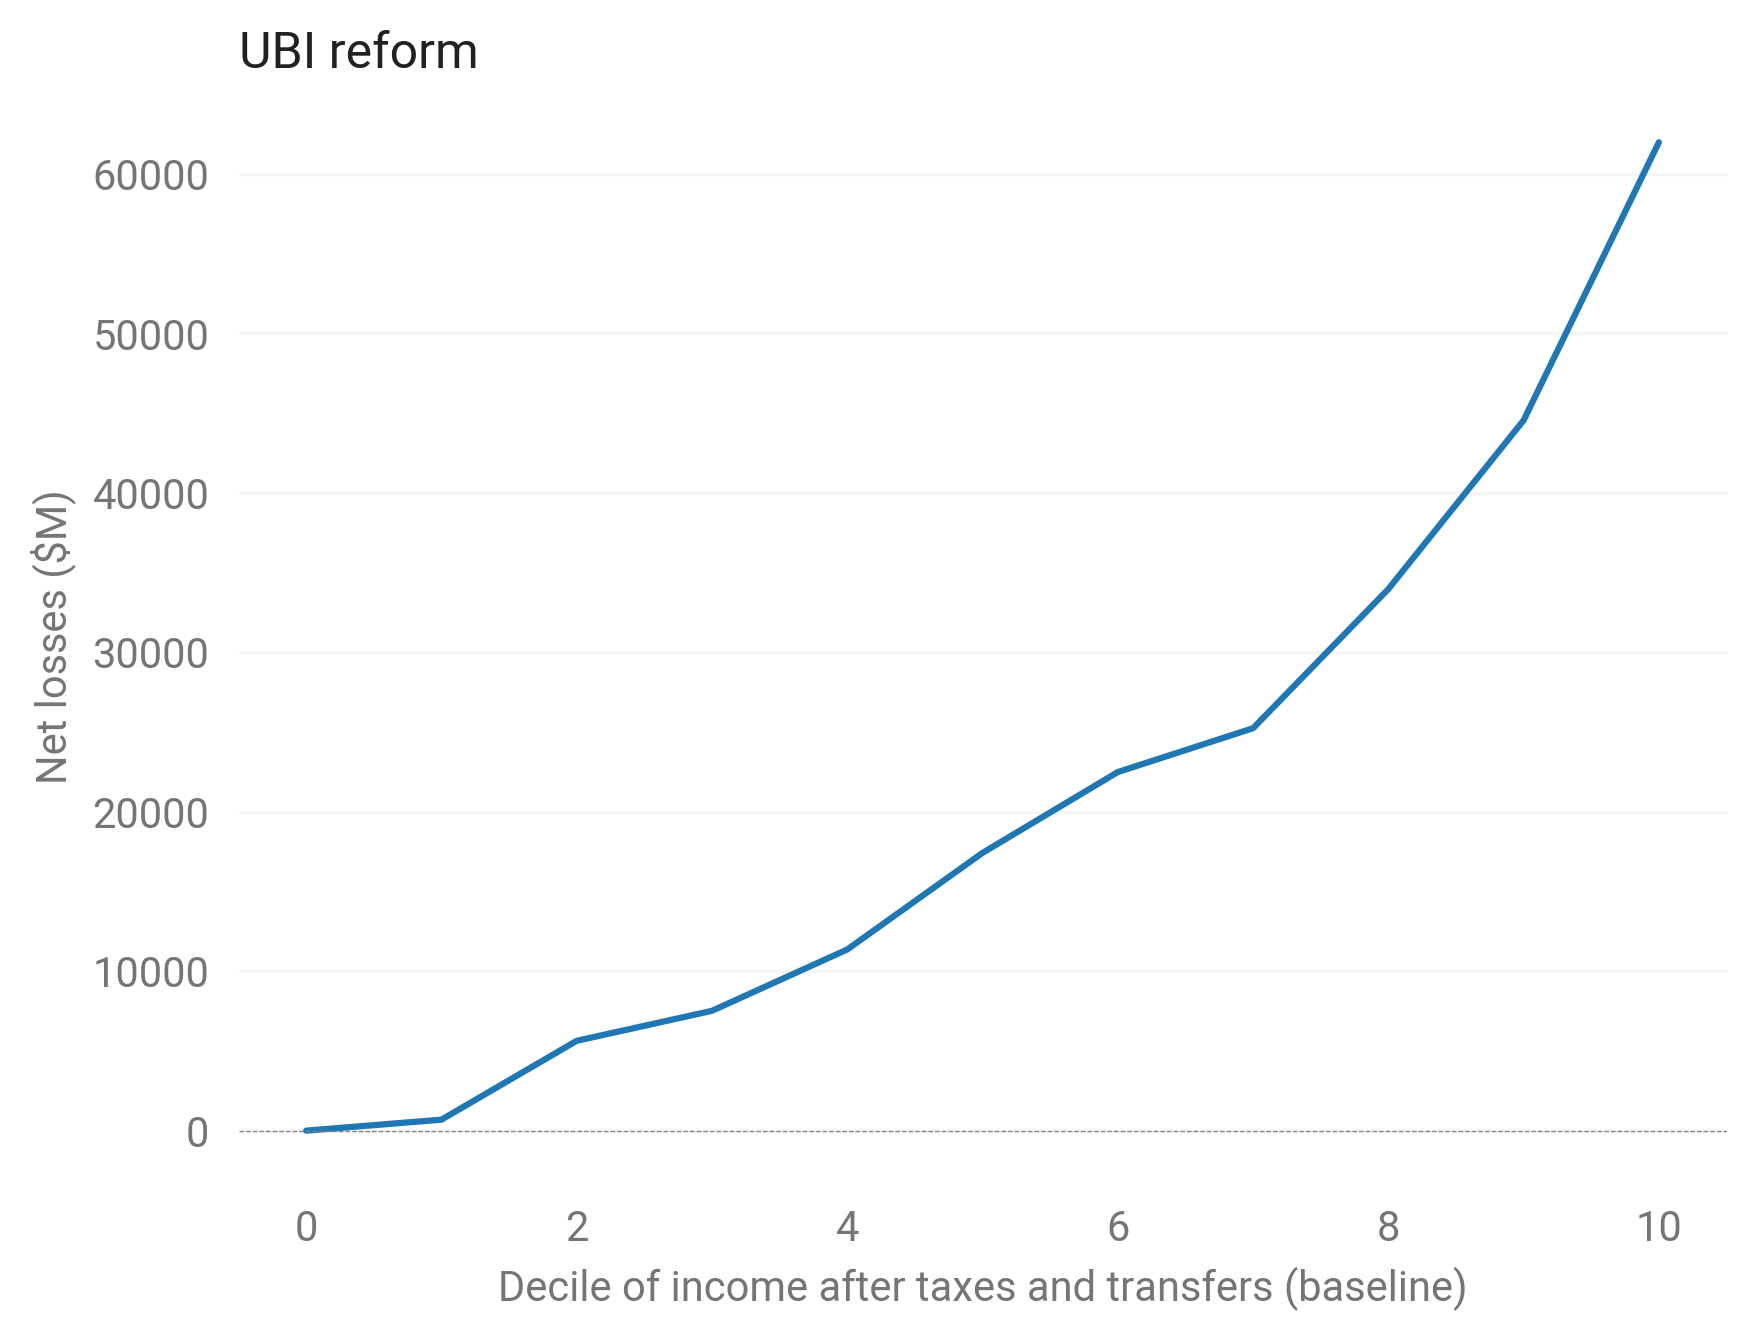

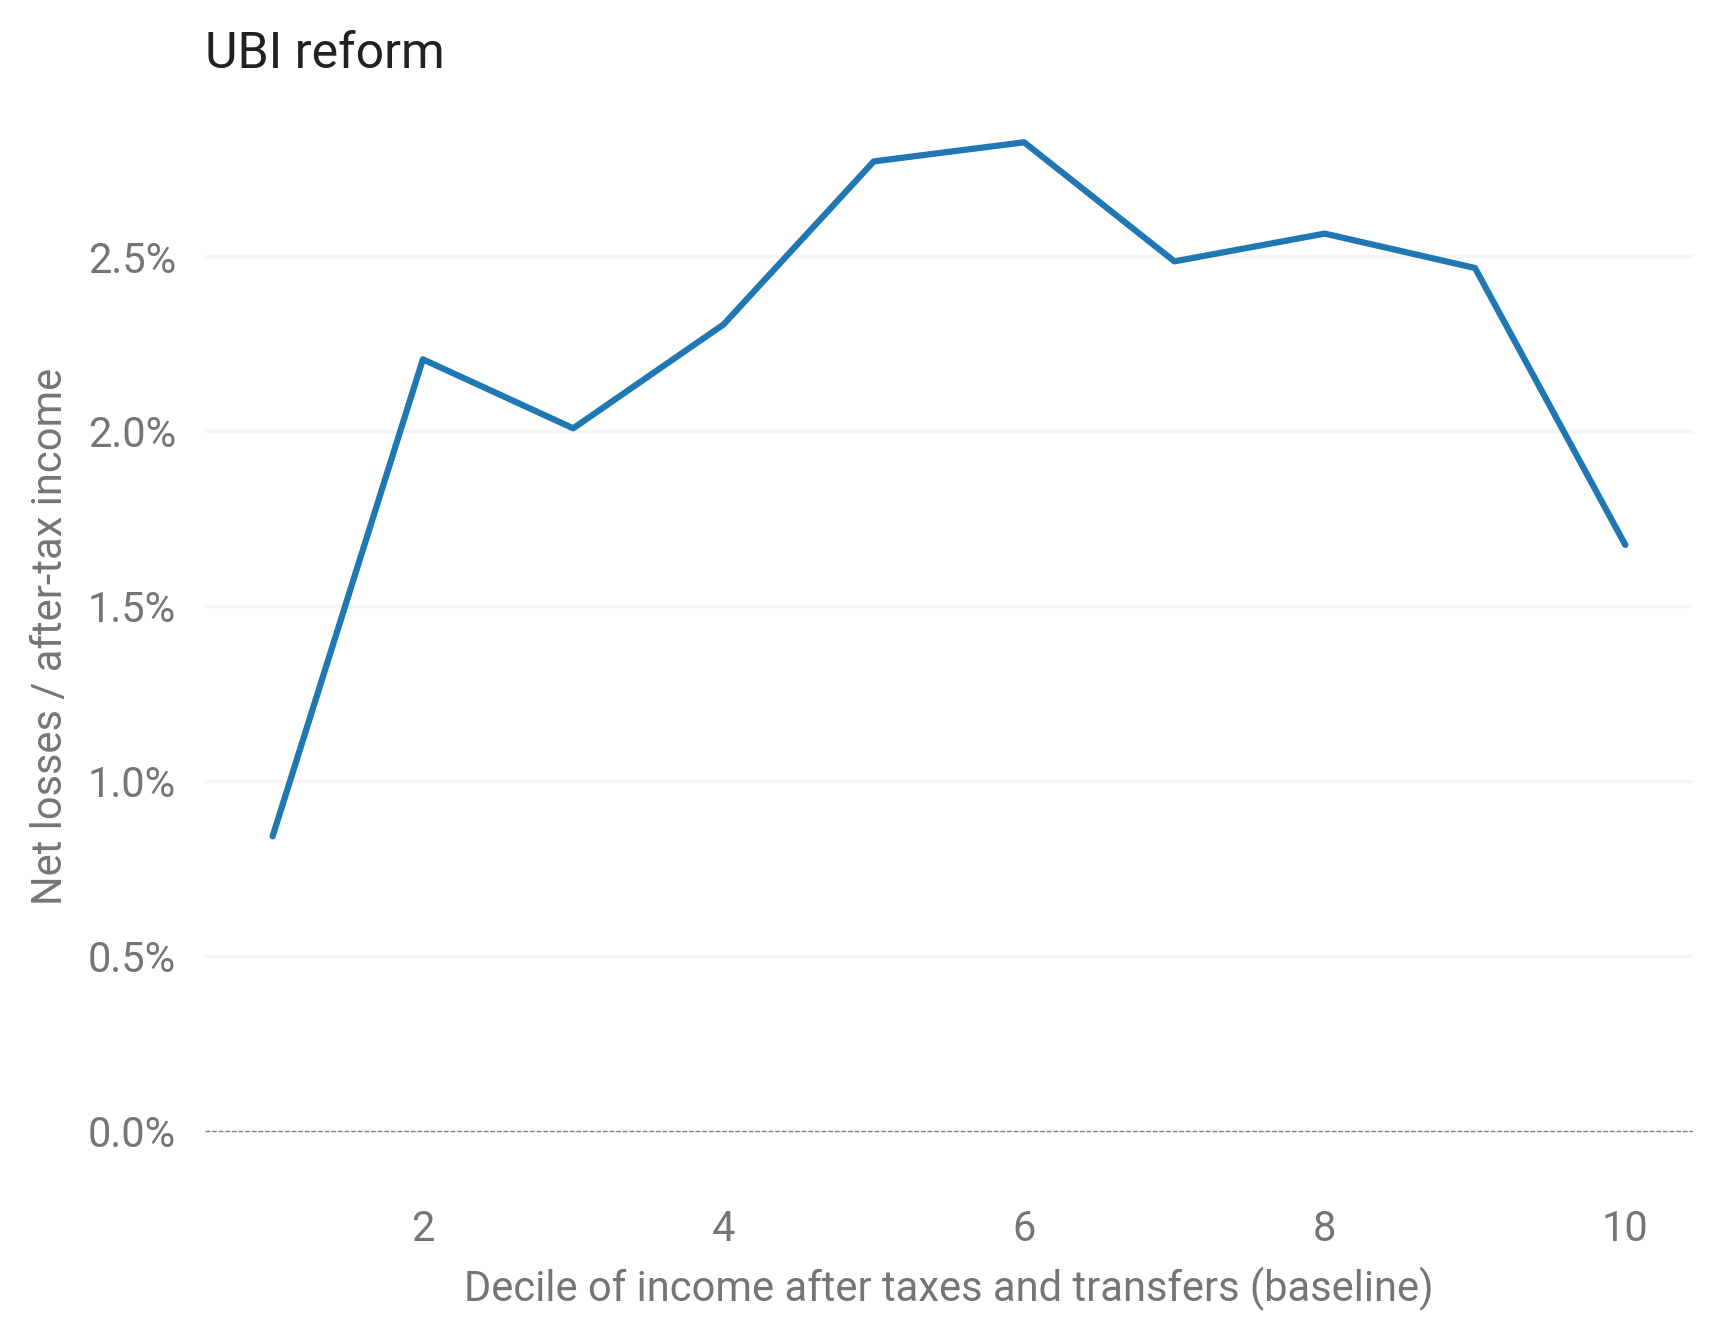

In [212]:
rnubi_decileplot(base, ubi2_nb)

UBI: $567
Total losses: $126B


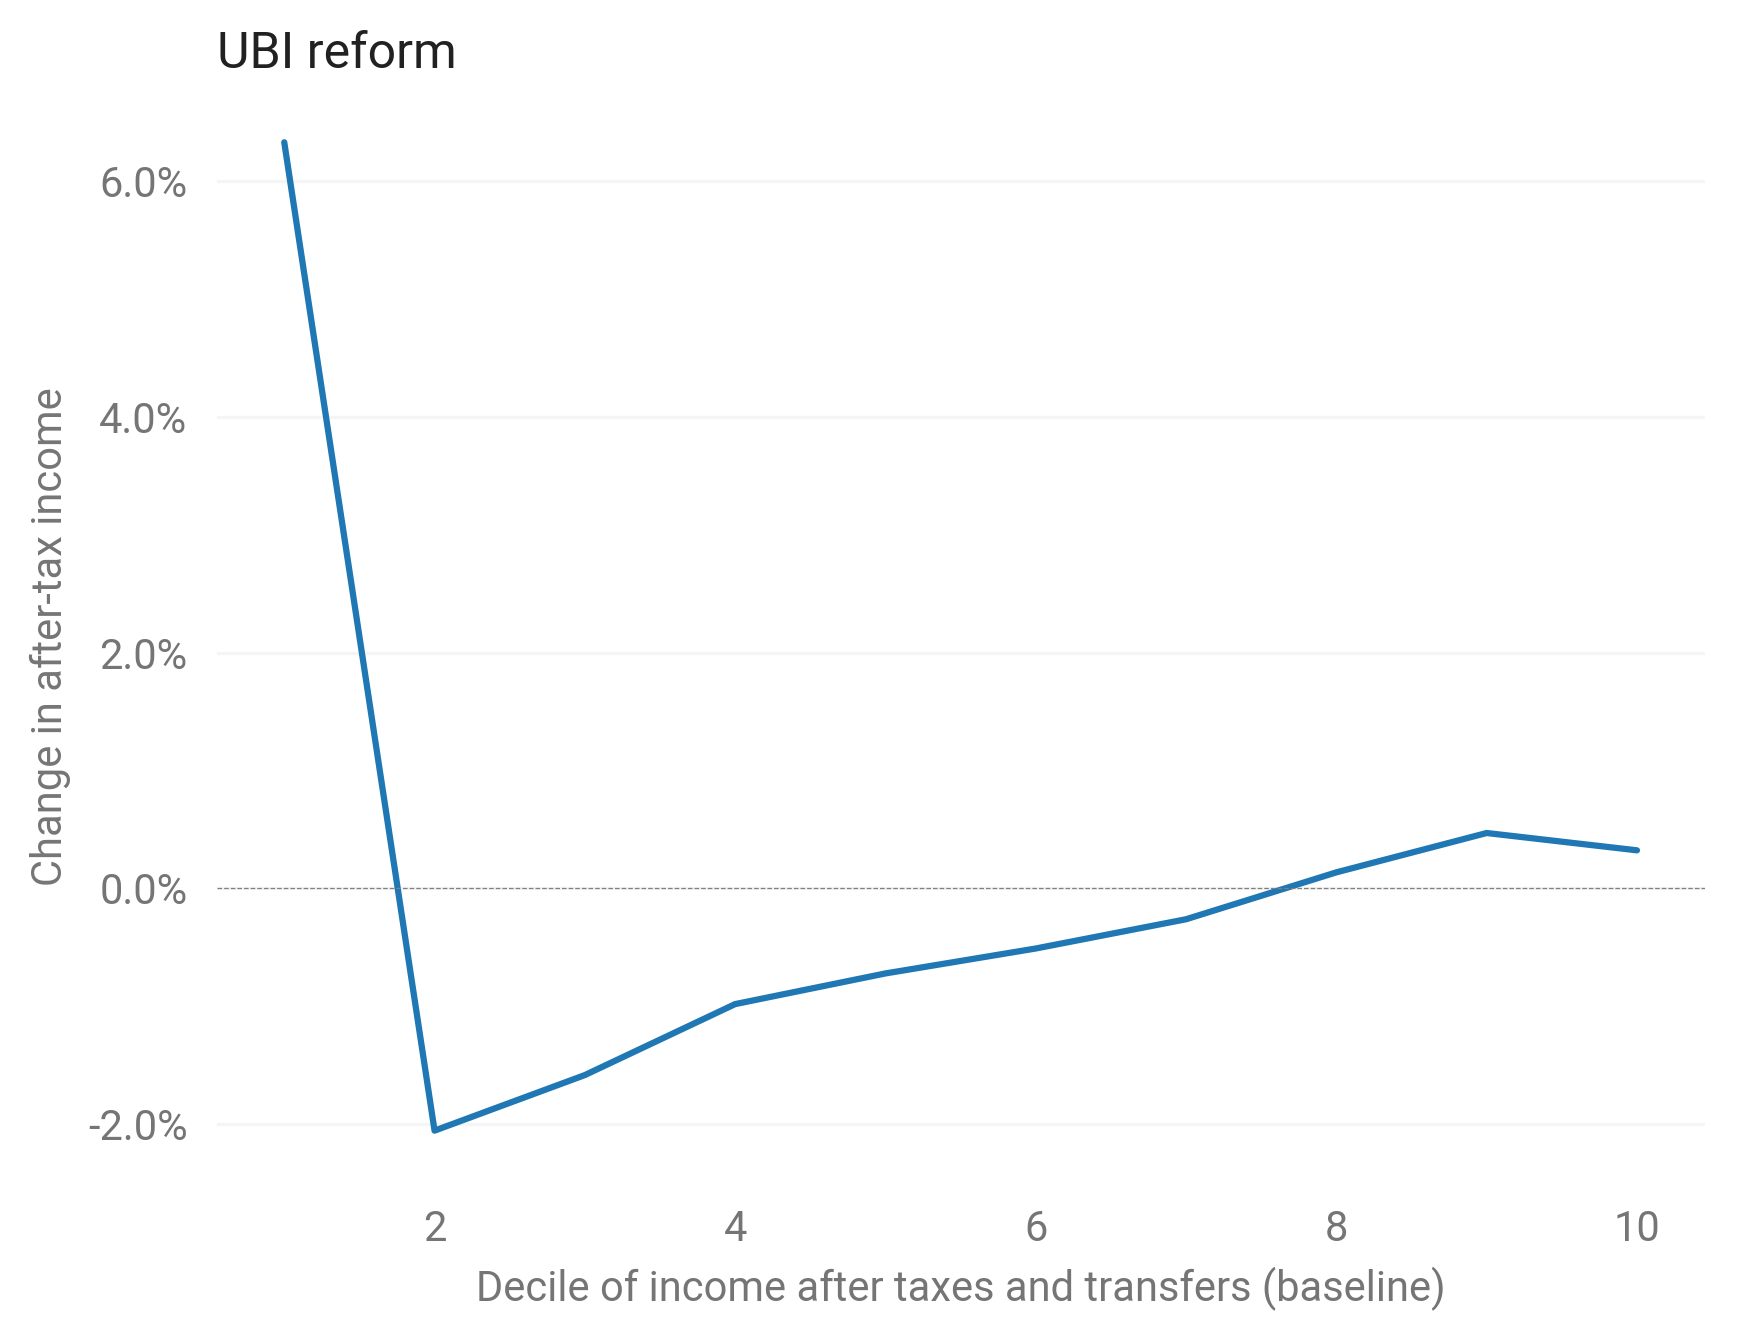

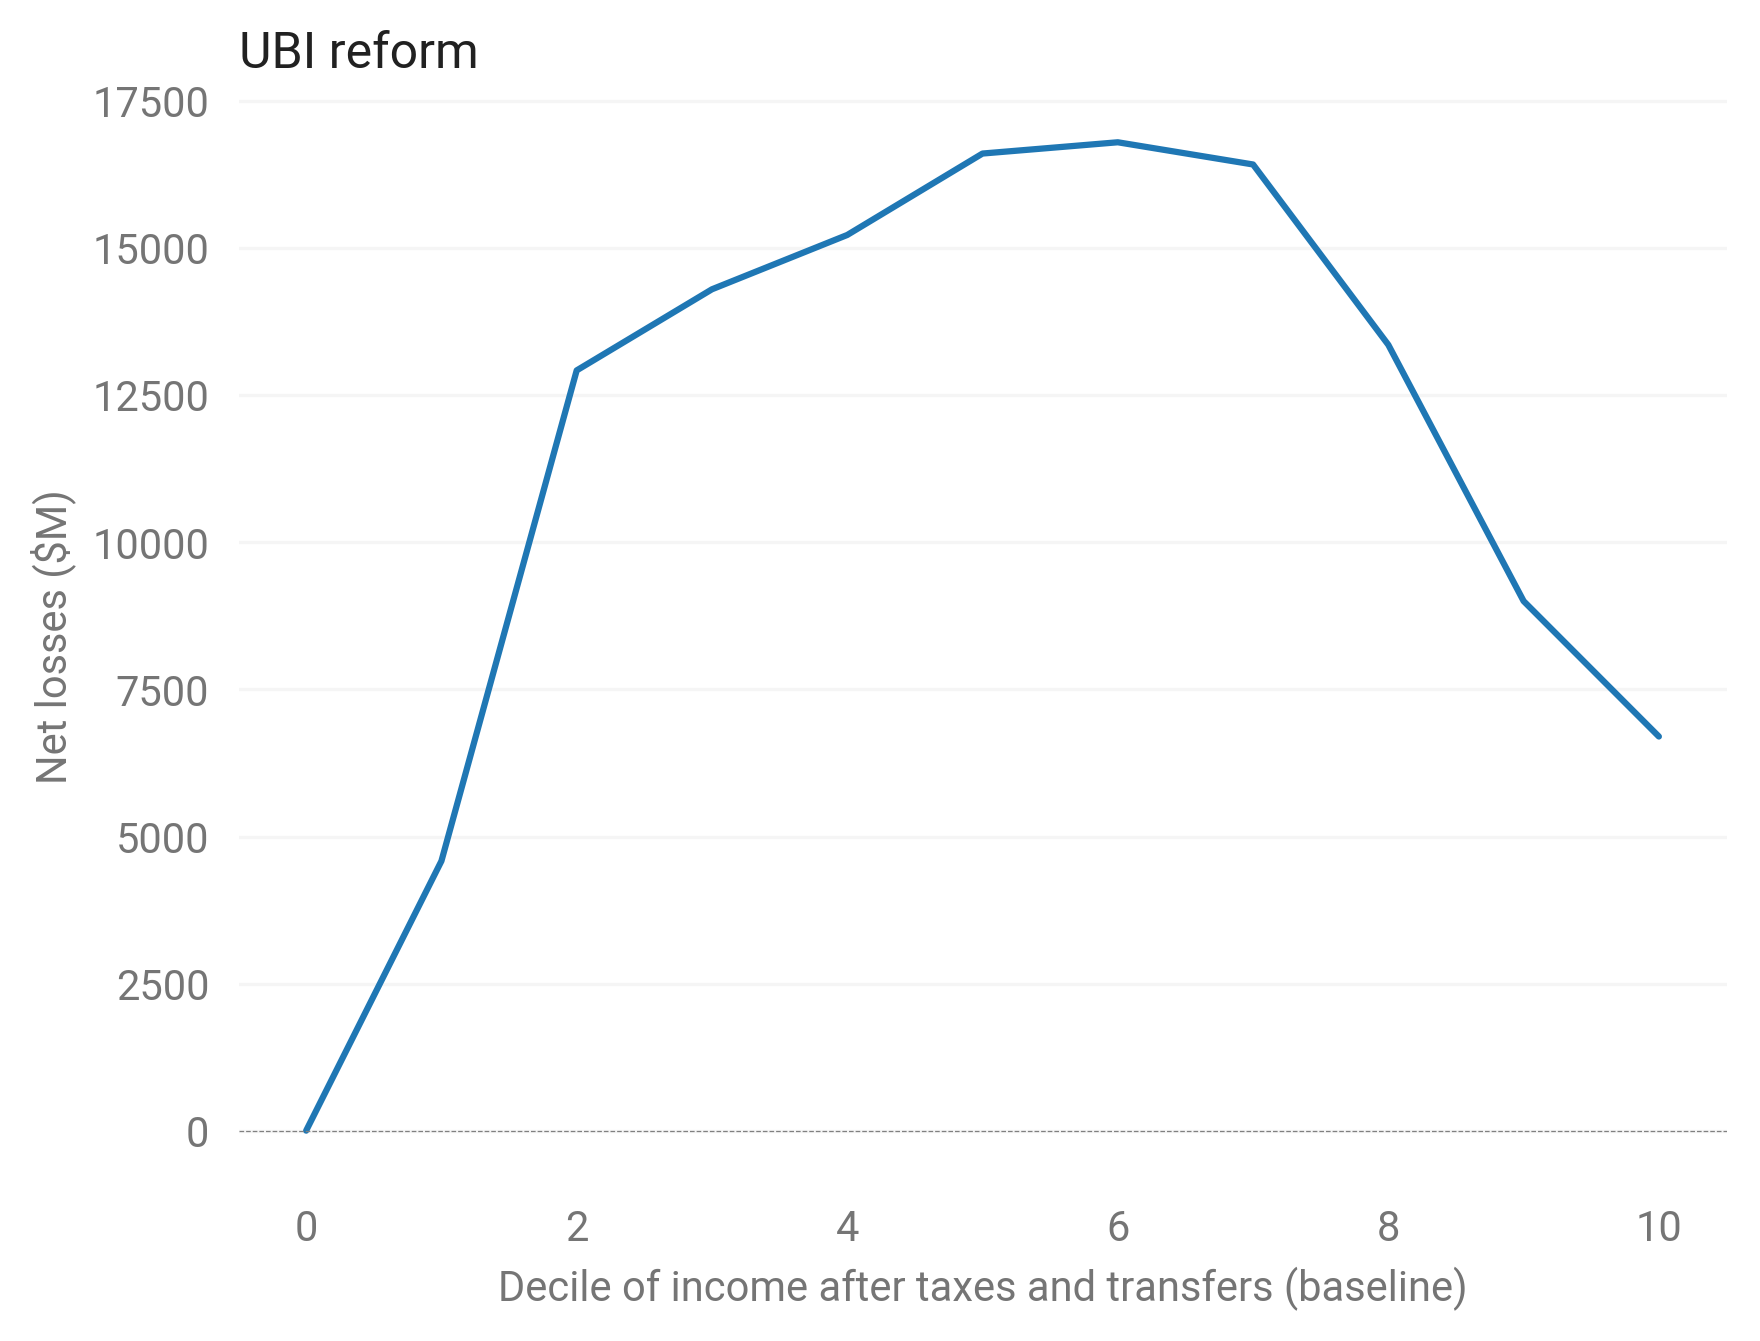

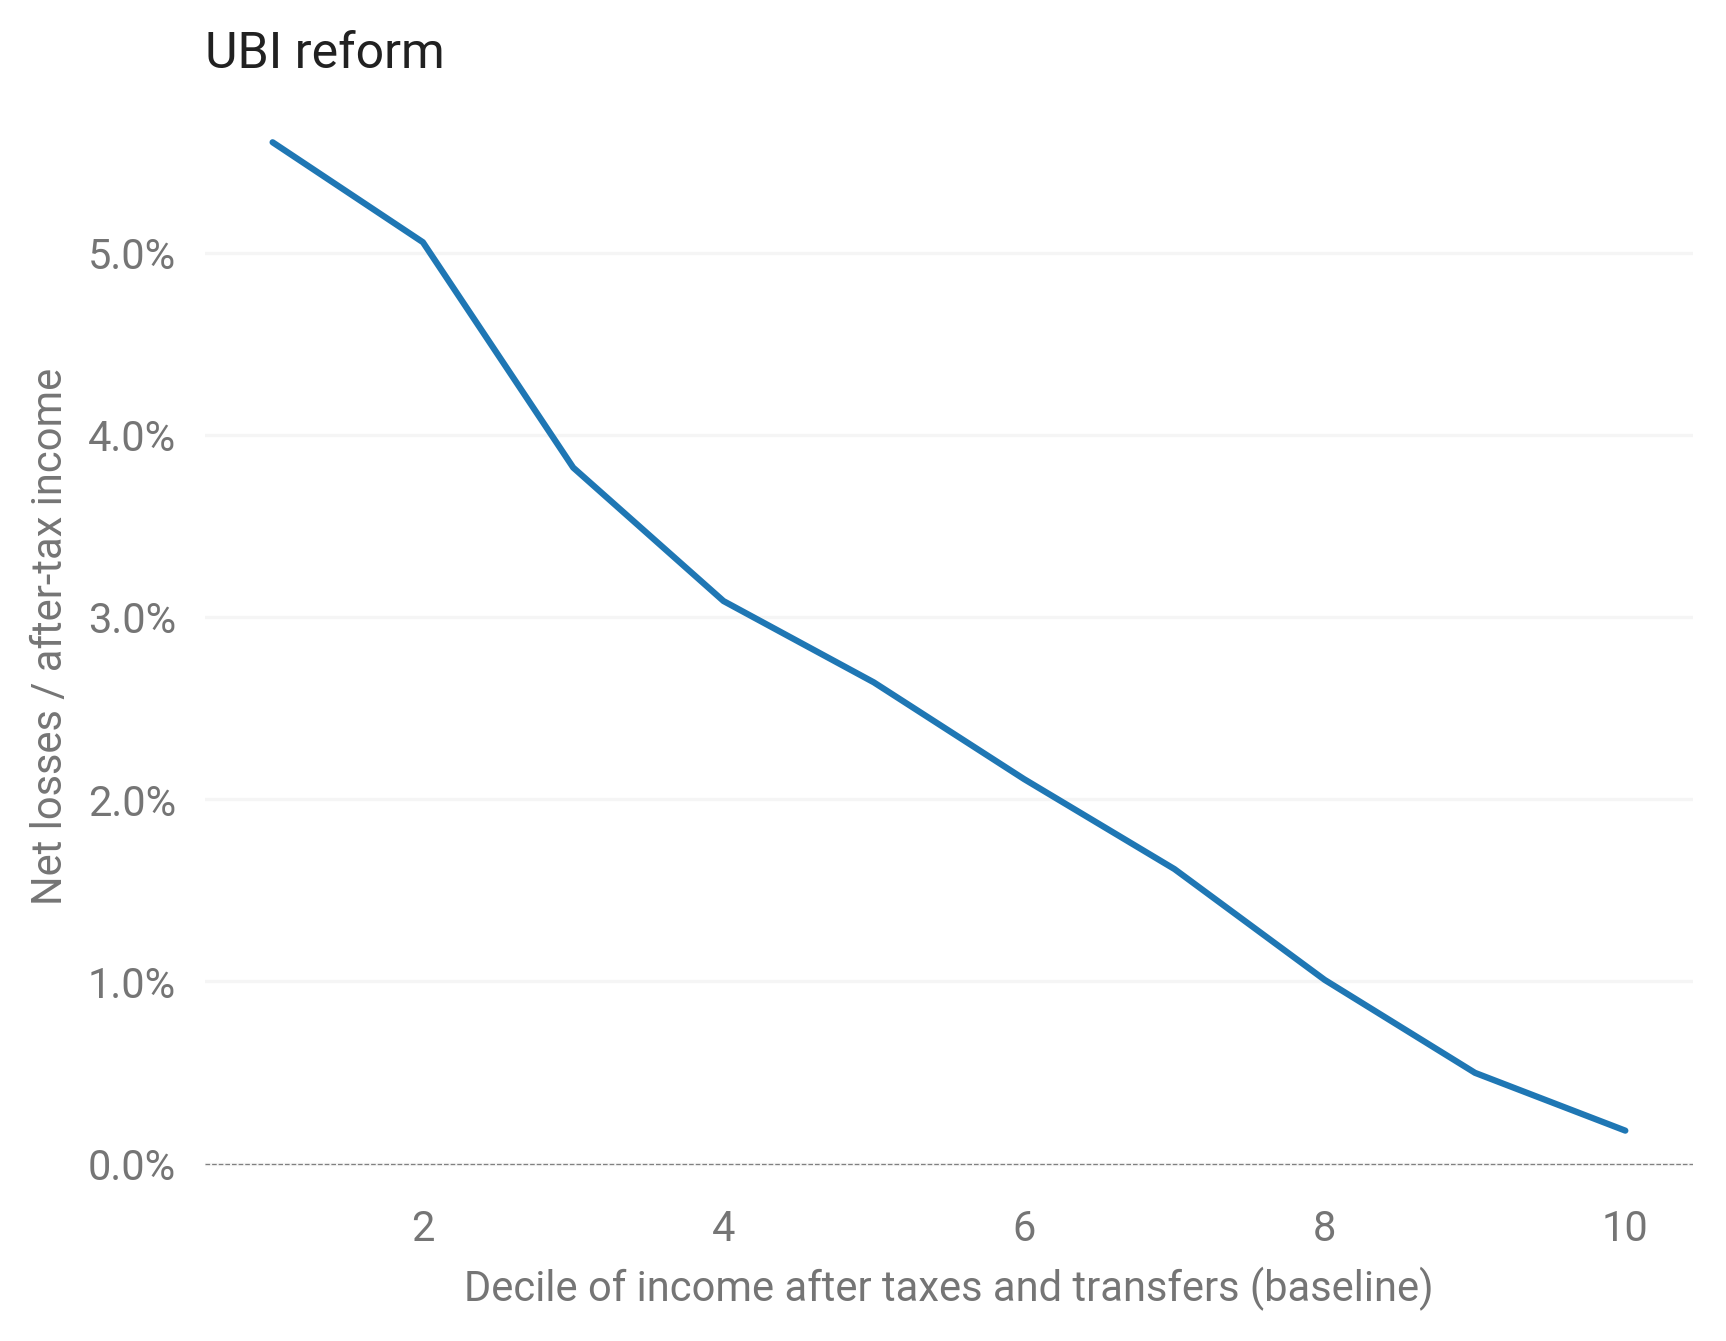

In [210]:
rnubi_decileplot(base, ubi1_nb)

UBI: $440
Total losses: $123B


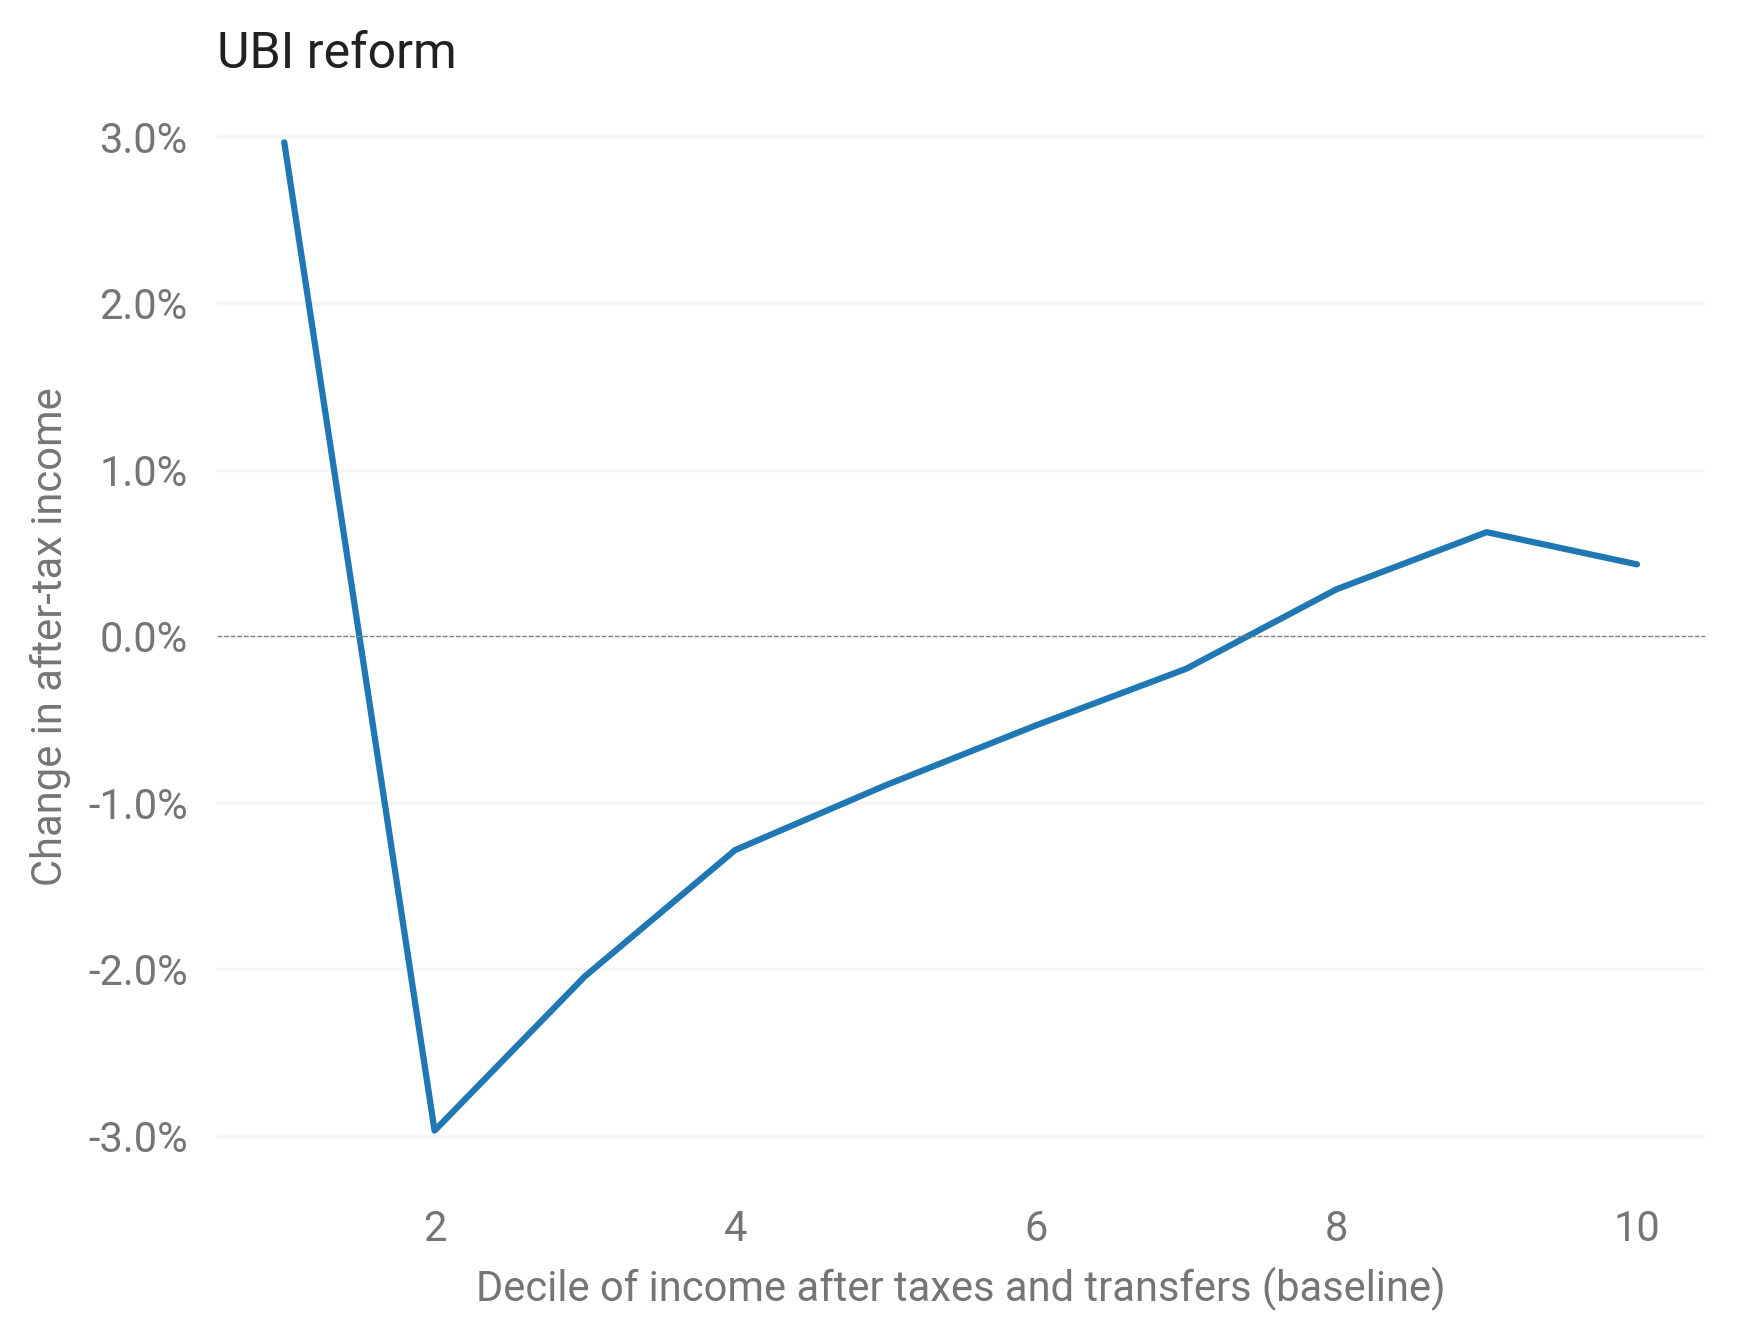

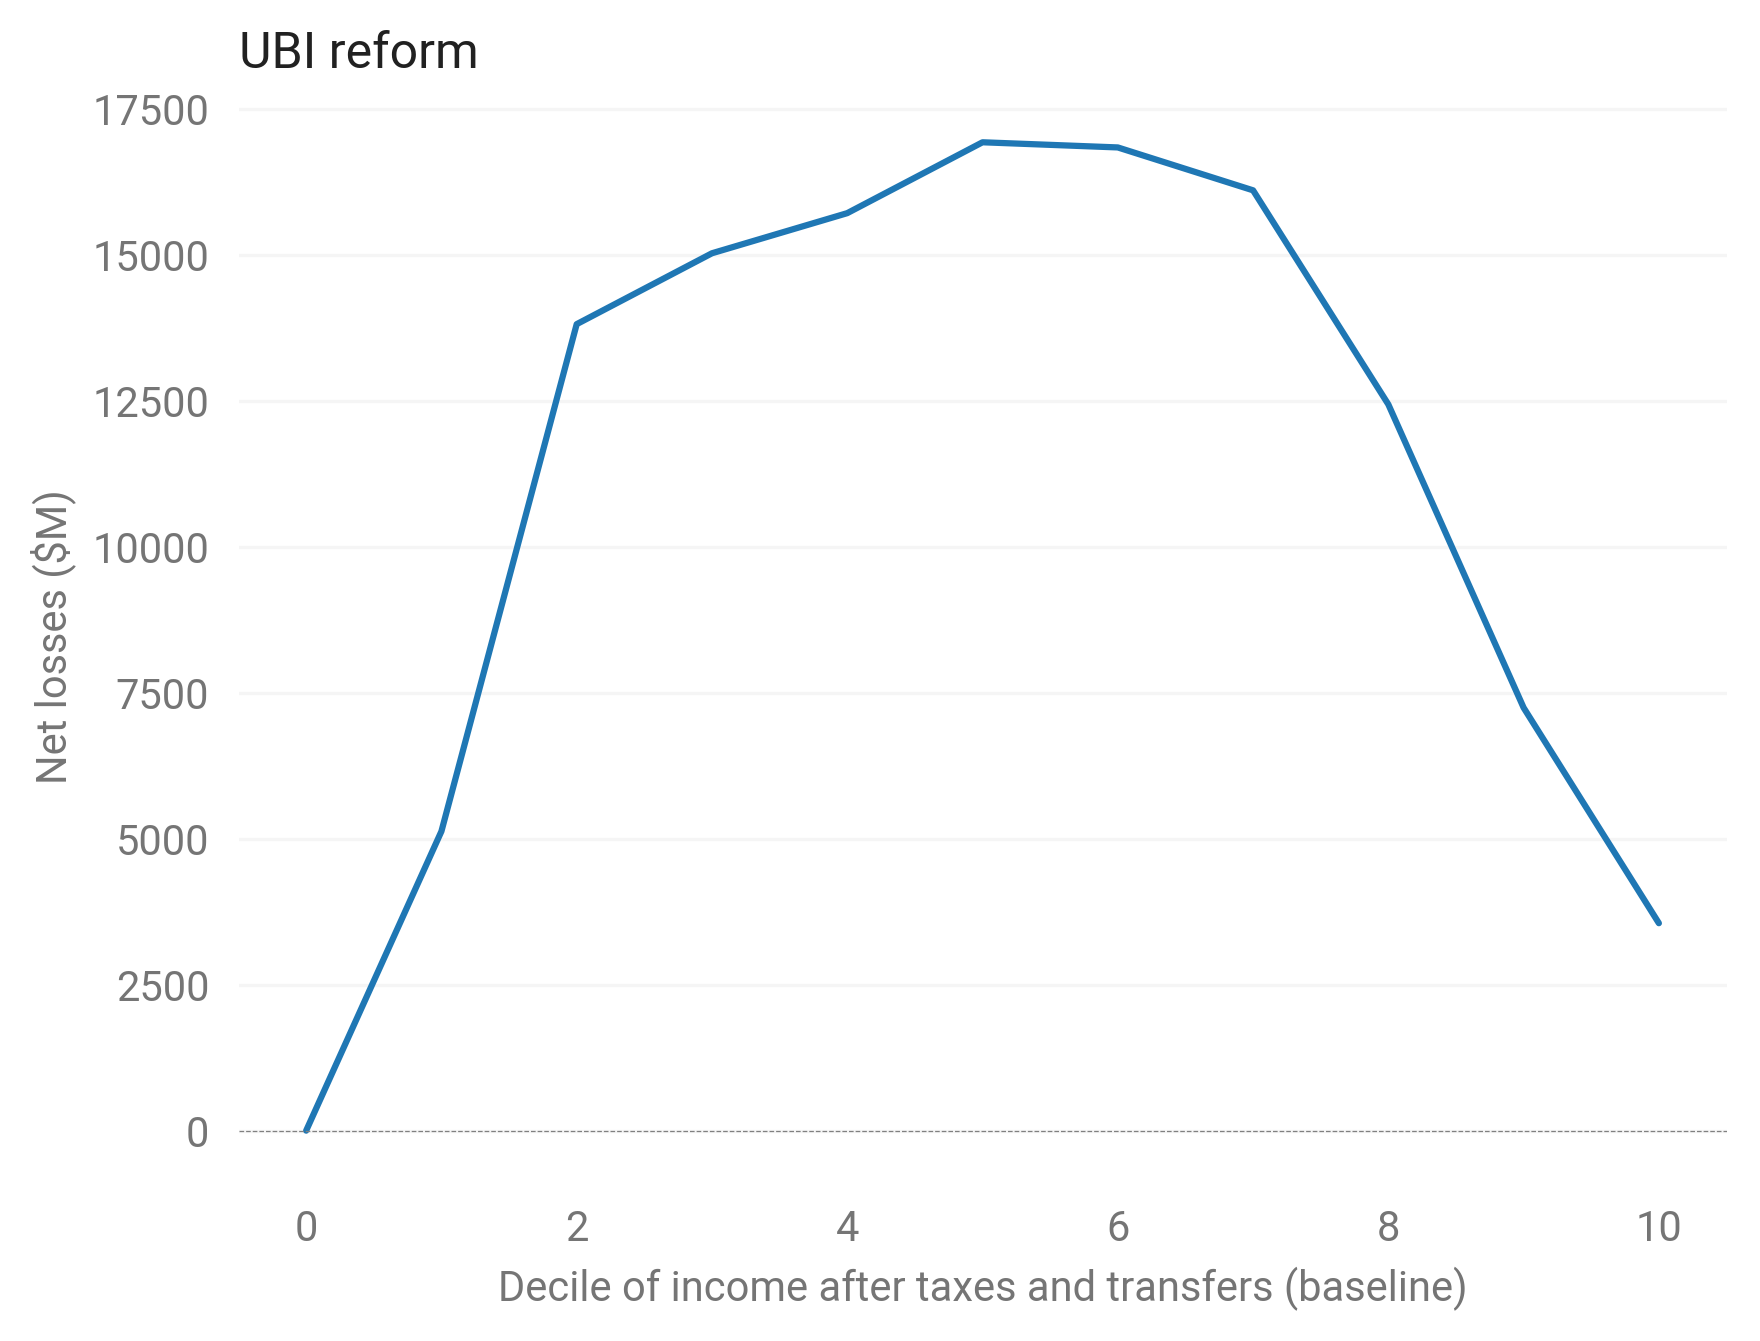

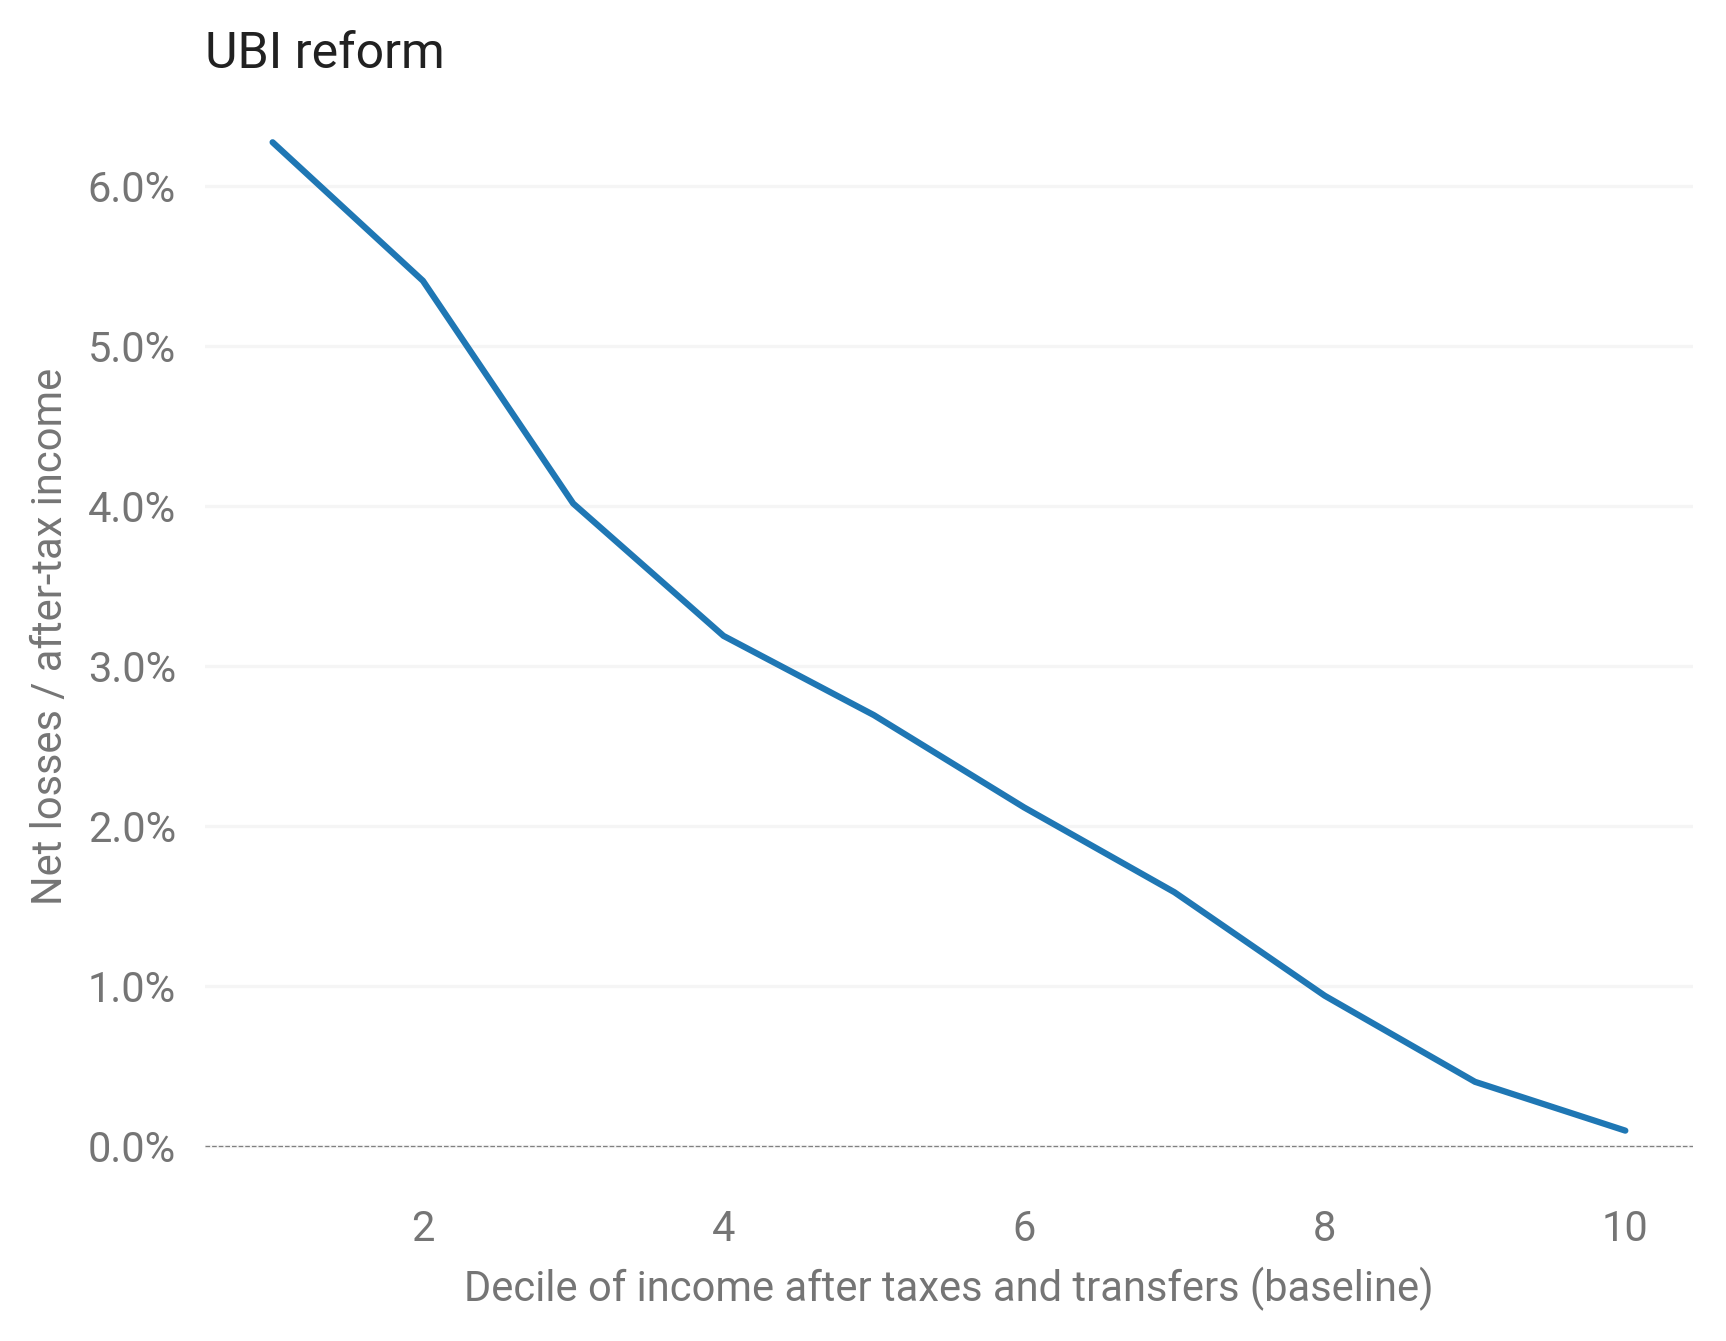

In [200]:
rnubi_decileplot(base, snap_repeal)

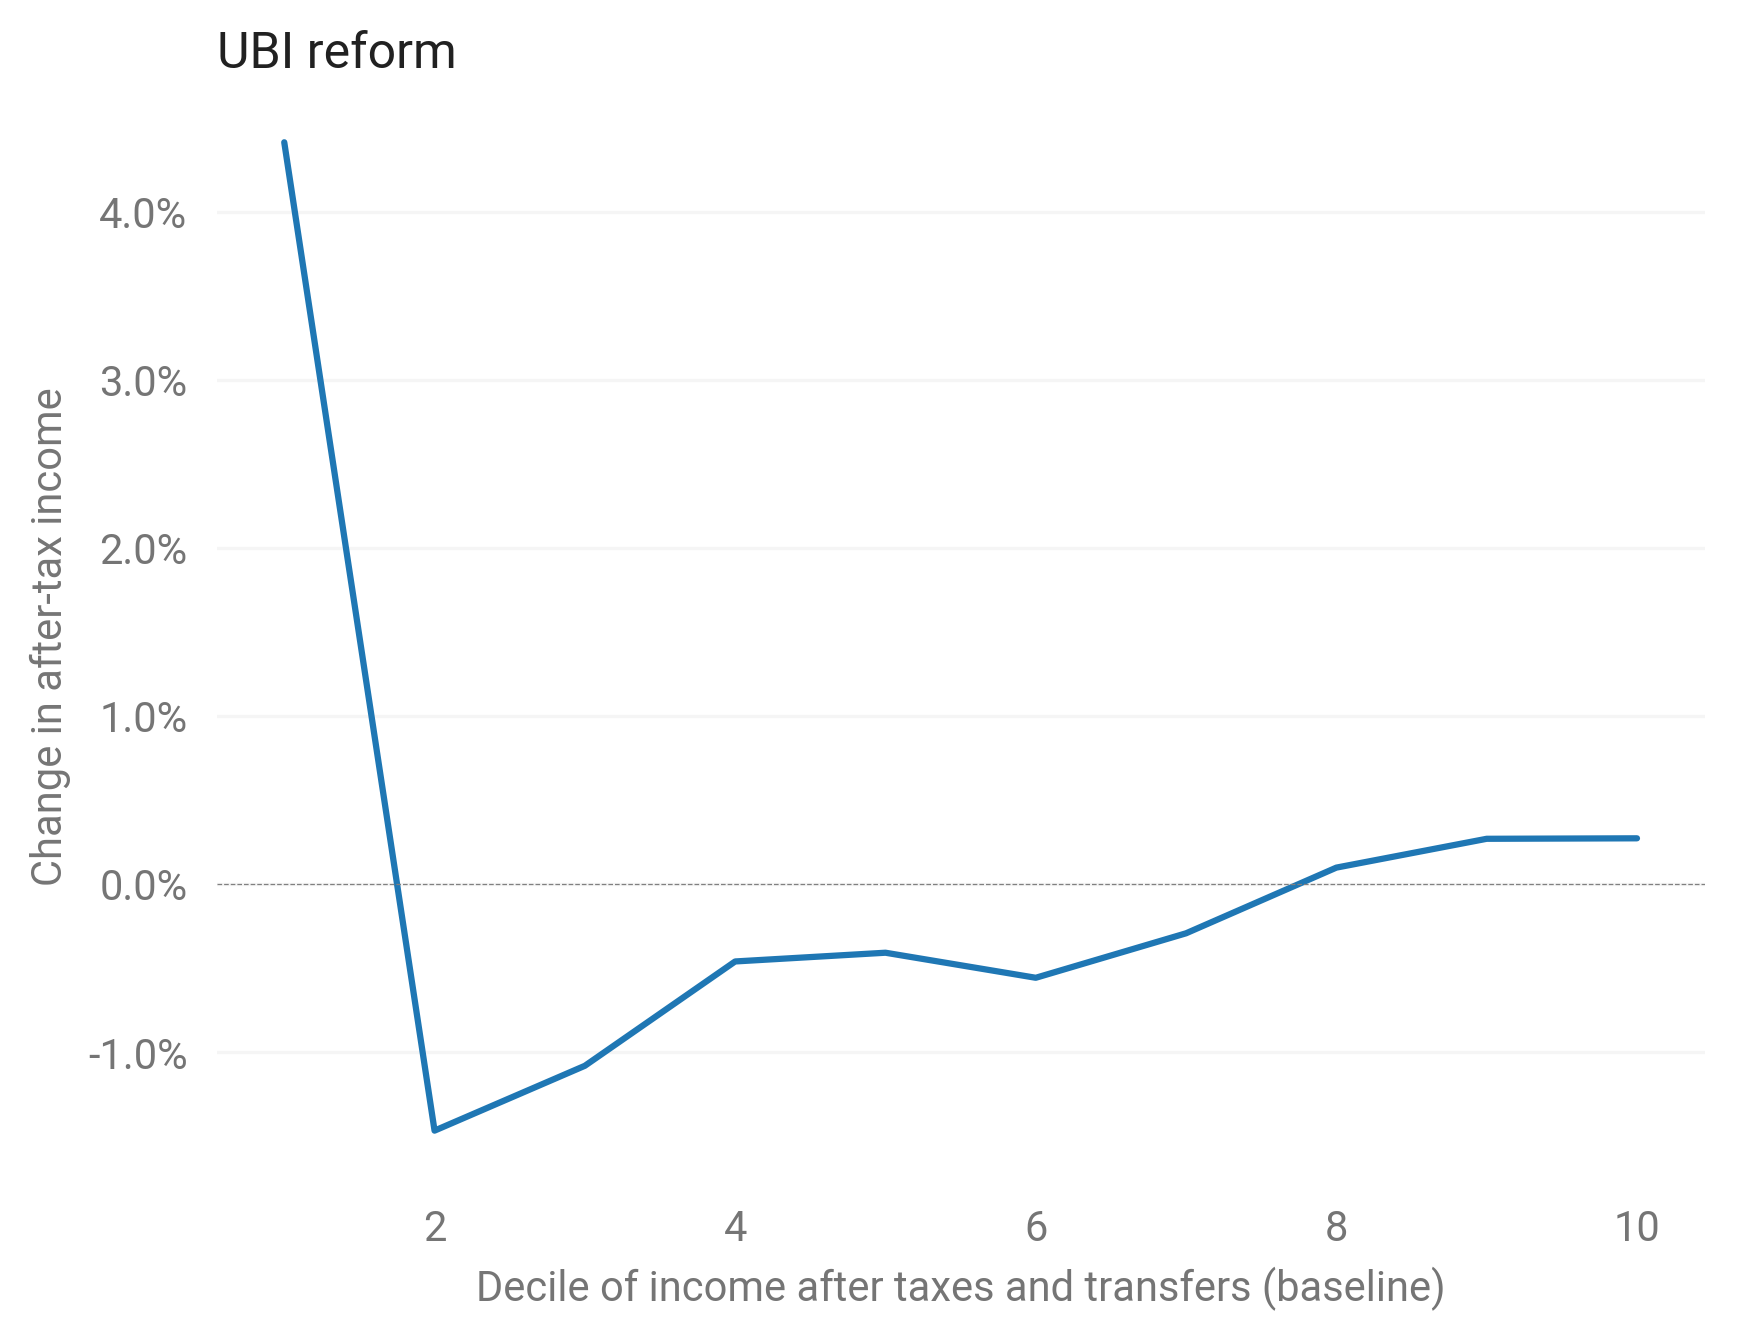

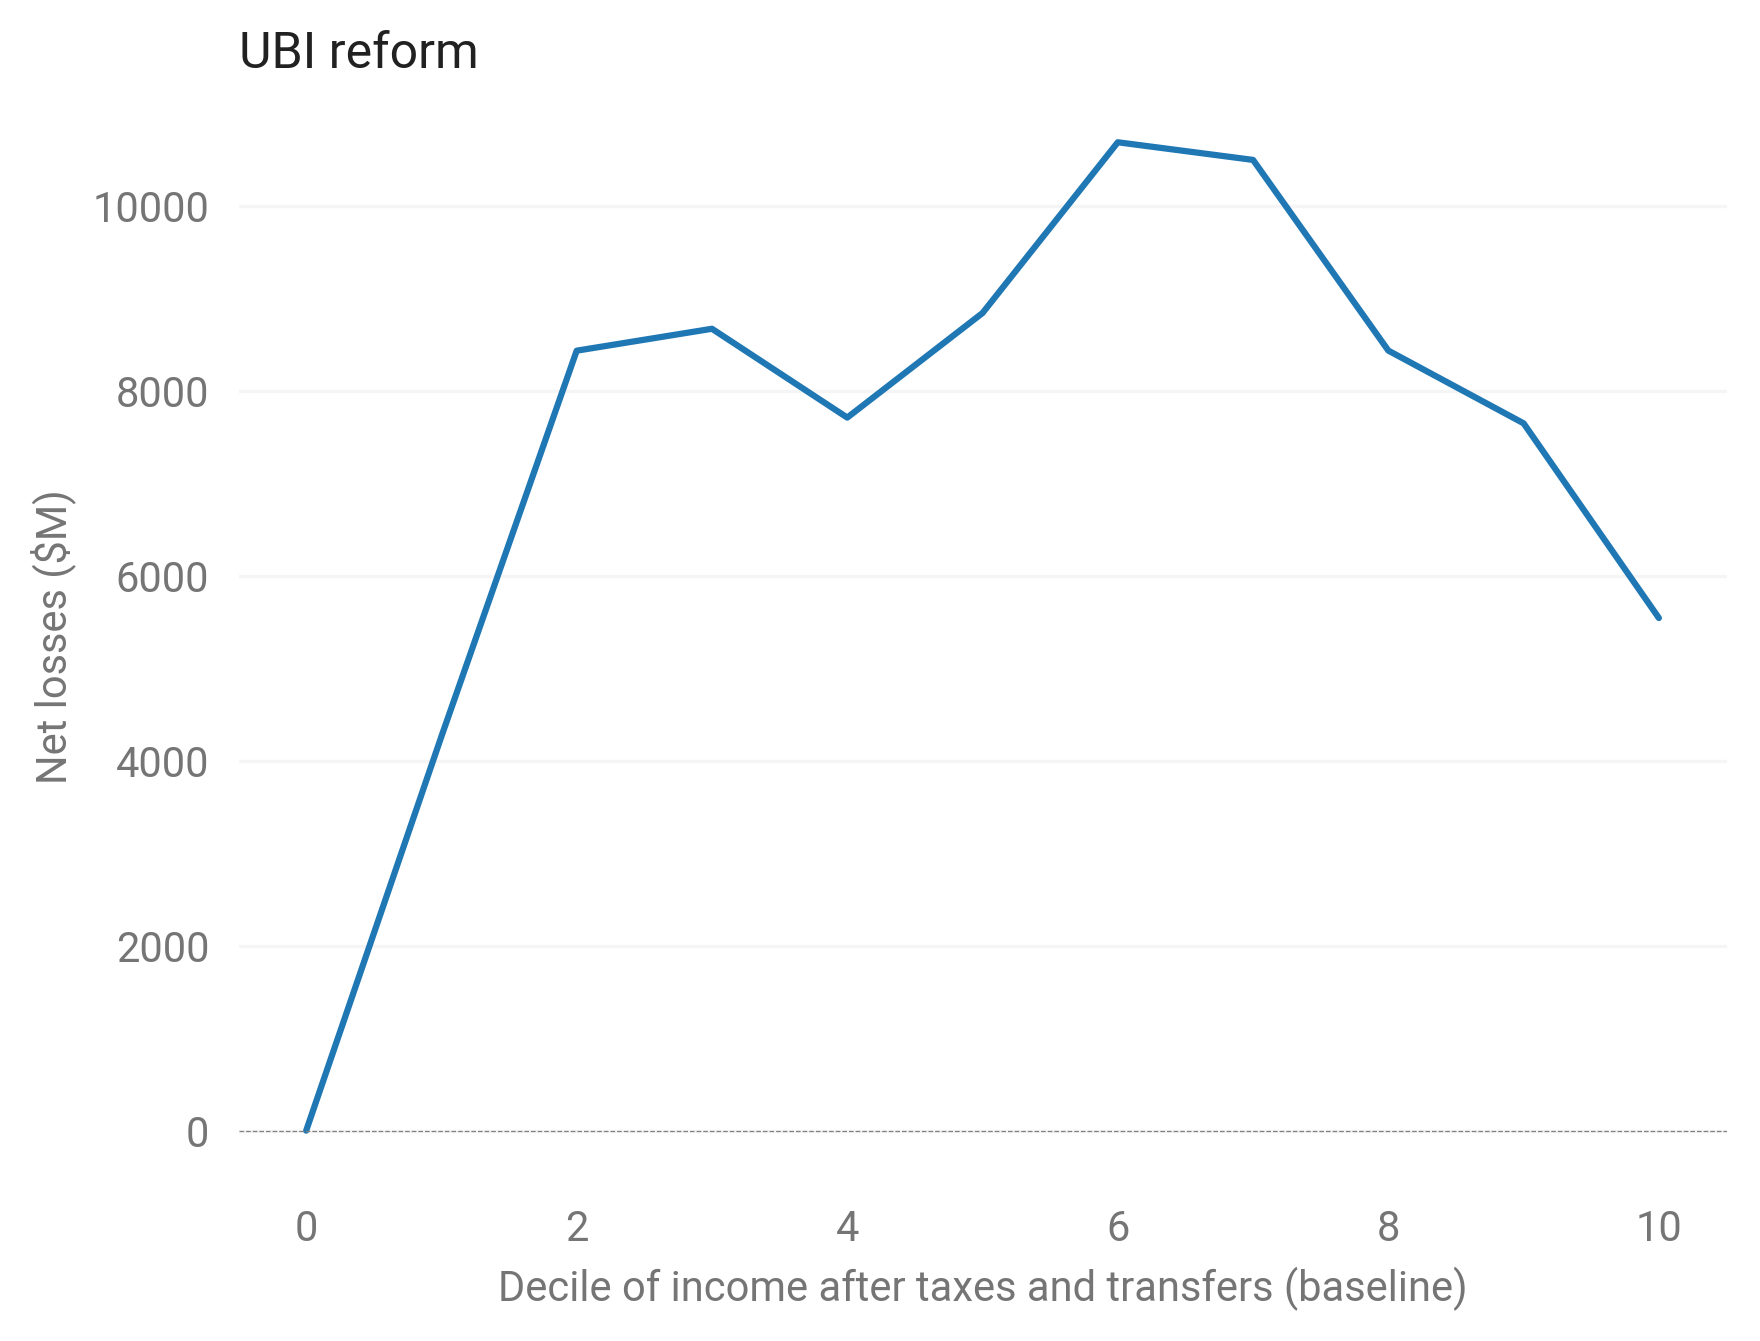

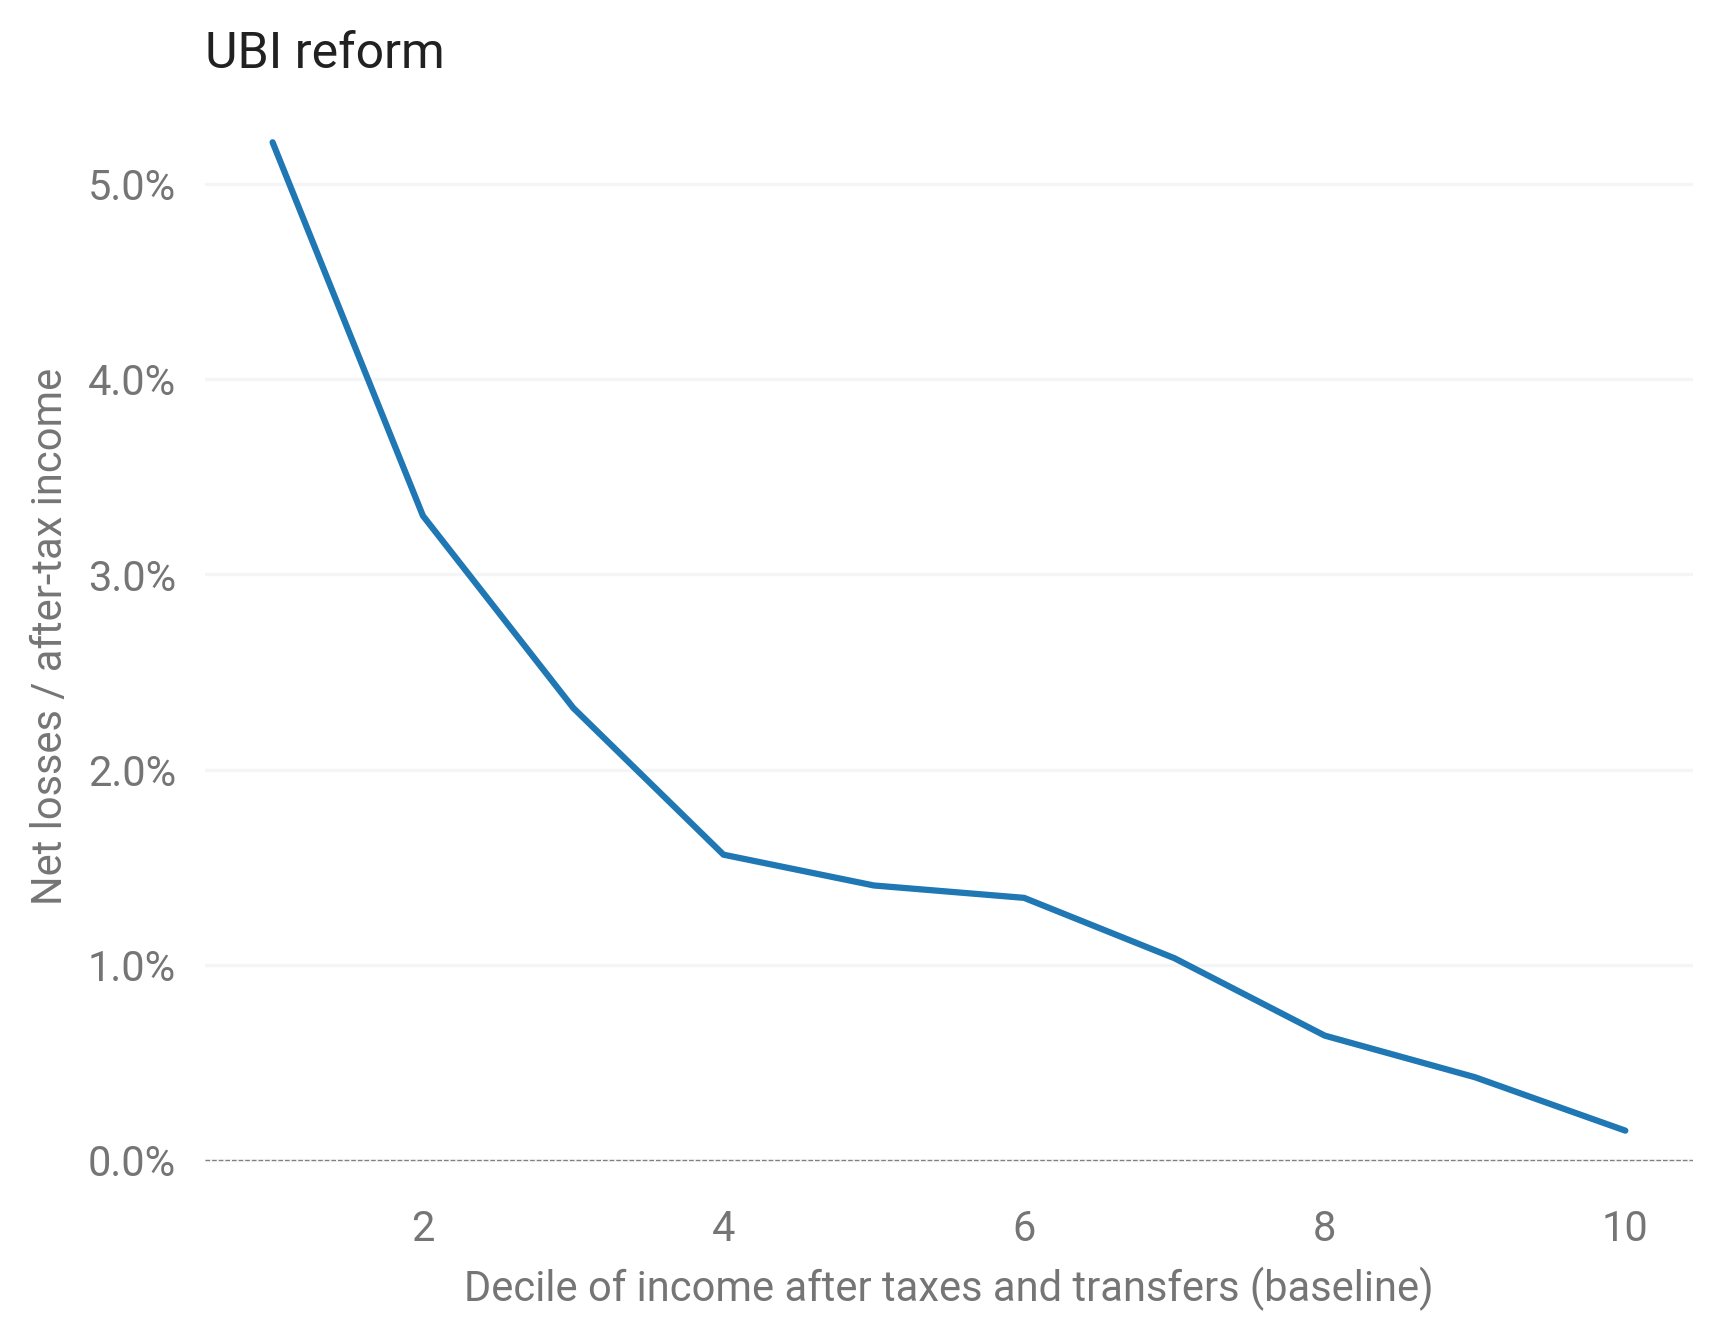

In [179]:
rnubi_decileplot(base, std2017)

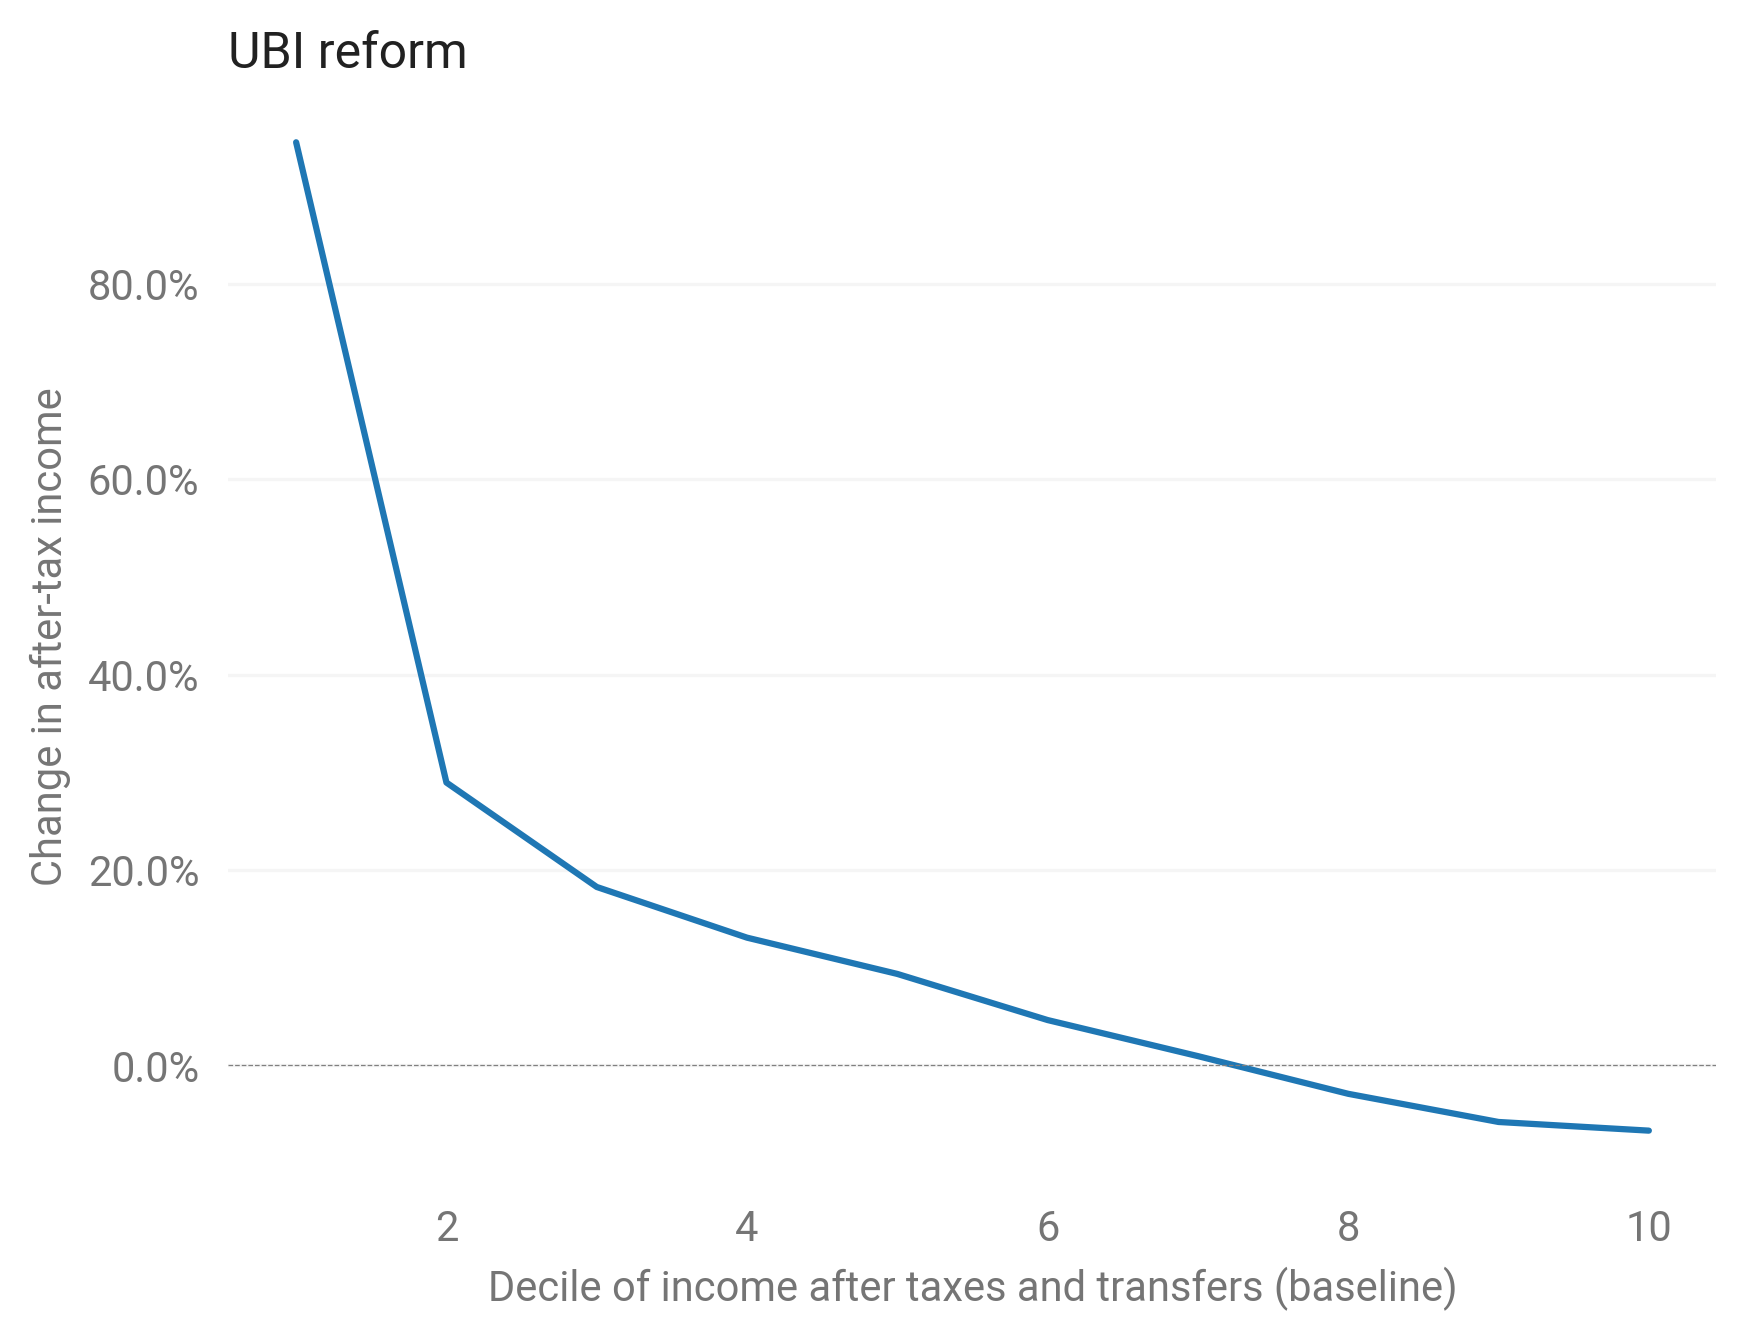

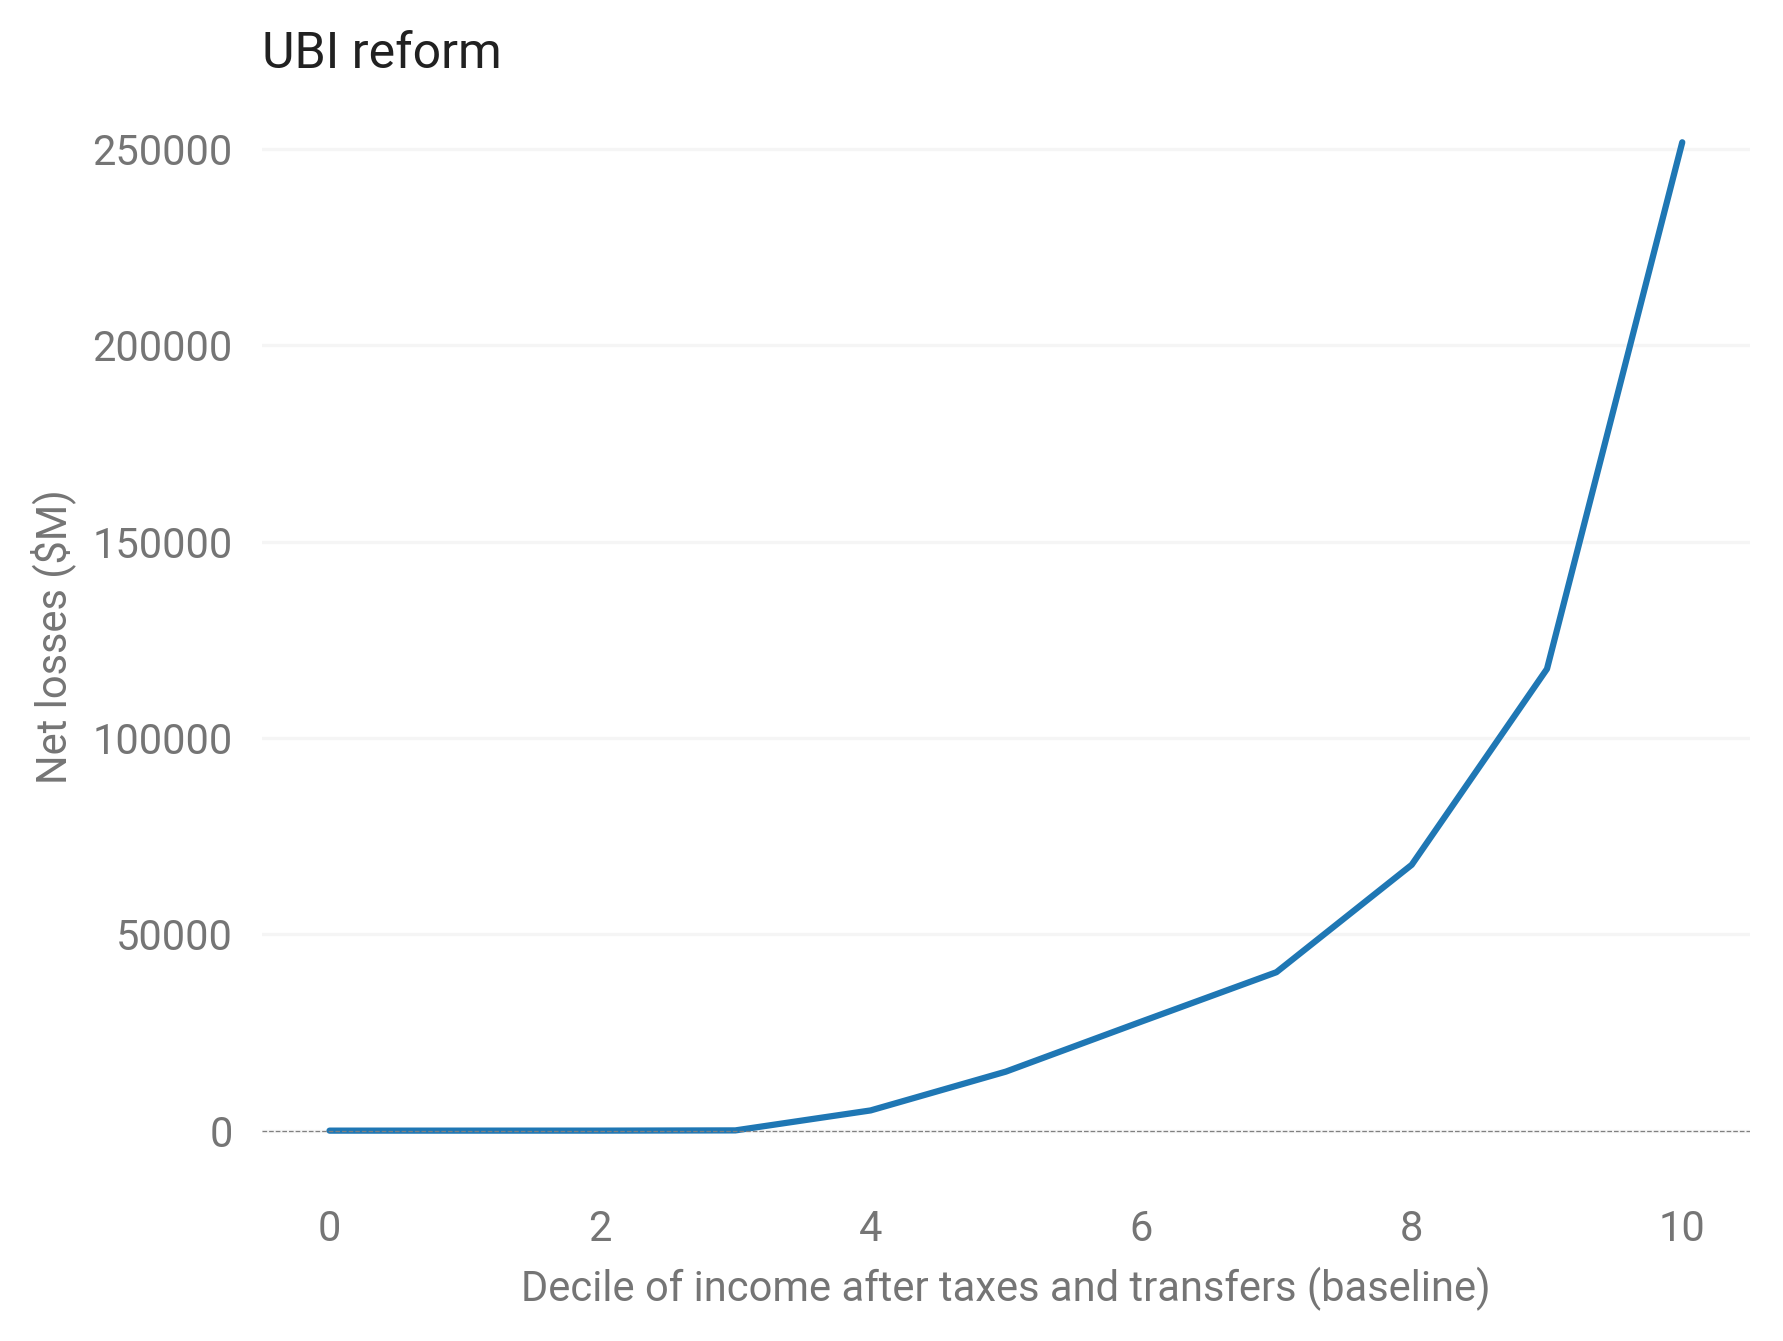

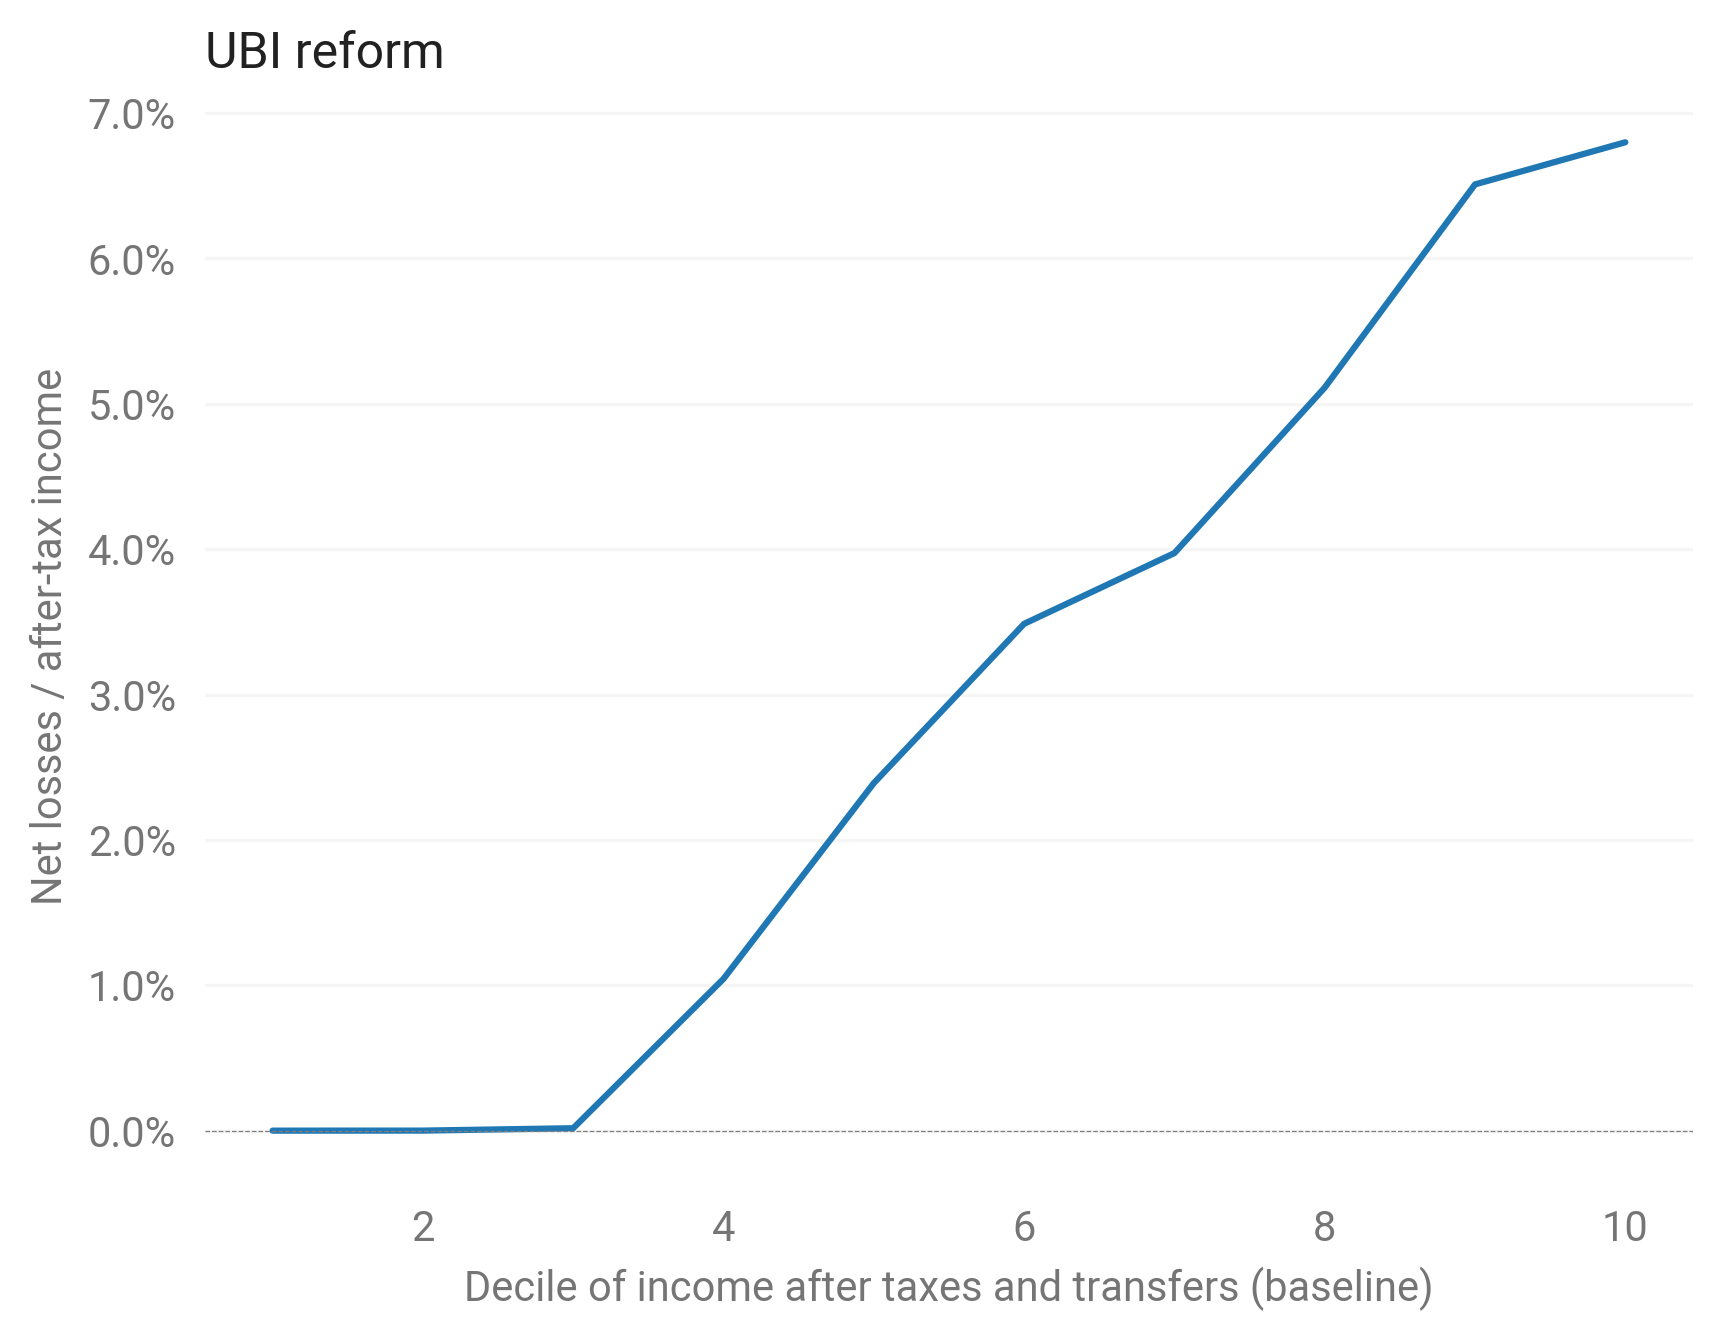

In [154]:
rnubi_decileplot(base, ubi4)

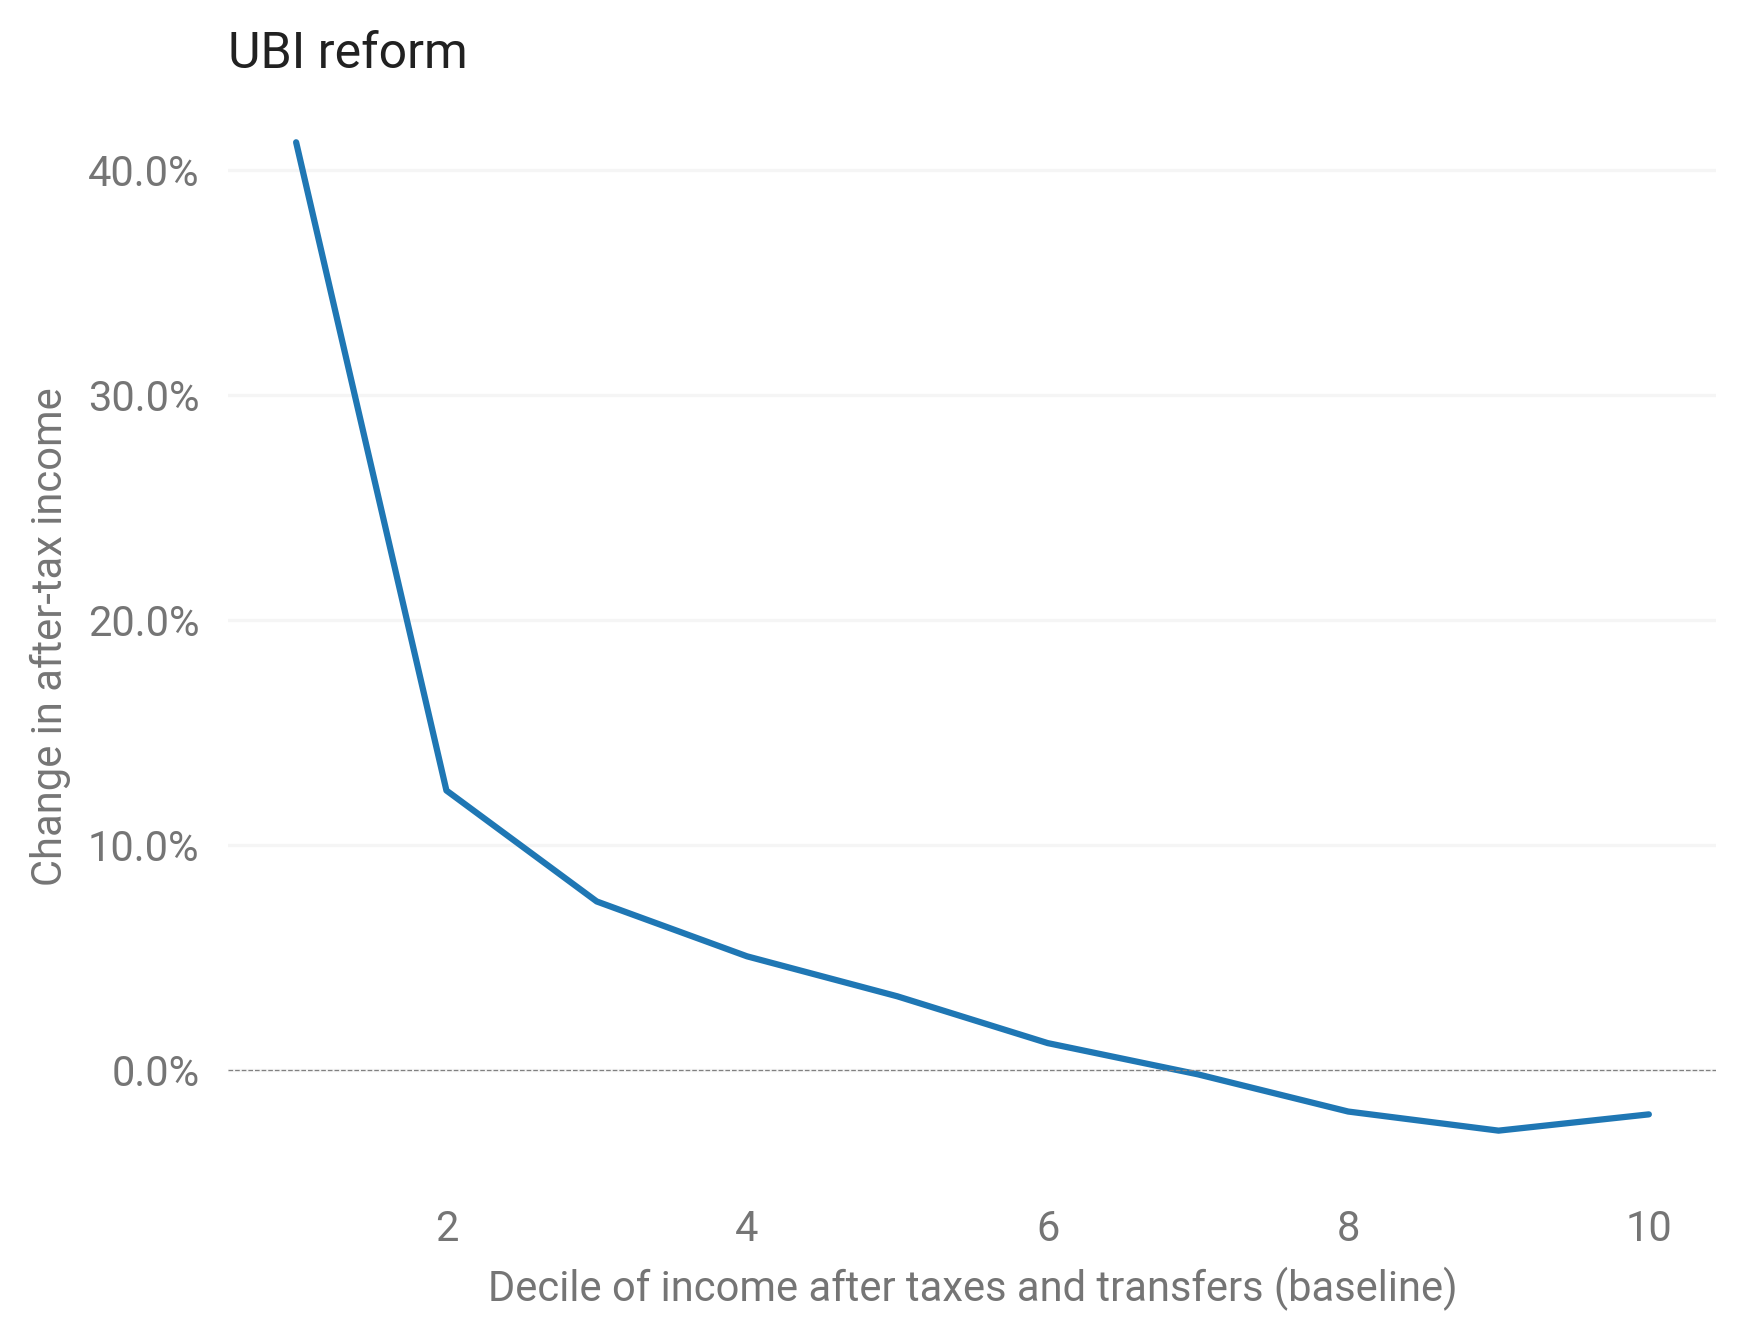

In [112]:
rnubi_decileplot(base, ubi2)

In [144]:
rnubi(base, ubi).loss_m.sum() / 1e3

18.333381885293893

In [145]:
rnubi(base, ubi2).loss_m.sum() / 1e3

216.39900790098466

In [146]:
rnubi(base, ubi3).loss_m.sum() / 1e3

271.3108911295128

In [147]:
rnubi(base, ubi4).loss_m.sum() / 1e3

525.2205041966439

In [148]:
rnubi(base, ubi5).loss_m.sum() / 1e3

623.6918989764819

In [149]:
rnubi(base, ubi6).loss_m.sum() / 1e3

691.665927189005

In [132]:
df1 = rnubi(base, ubi)

In [133]:
df1.

,aftertax_income,nu18,s006,XTOT,s006_m,aftertax_income_m,XTOT_m,nu18_m,aftertax_income_percentile_exact,aftertax_income_percentile,aftertax_income_2percentile,aftertax_income_ventile,aftertax_income_decile,aftertax_income_quintile,aftertax_income_quartile,afti_ubi,afti_ubi_m,loss_m,pct_loss
RECID,,,,,,,,,,,,,,,,,,,
37356,0.00e+00,0.0,60.49,2.0,6.05e-05,0.00,1.21e-04,0.00e+00,0.0,0,0,0,0,0,0,2.54e+02,0.02,0.00e+00,NaN
394743,0.00e+00,1.0,499.17,3.0,4.99e-04,0.00,1.50e-03,4.99e-04,0.0,0,0,0,0,0,0,3.81e+02,0.19,0.00e+00,NaN
29540,0.00e+00,0.0,1209.73,2.0,1.21e-03,0.00,2.42e-03,0.00e+00,0.0,0,0,0,0,0,0,2.54e+02,0.31,0.00e+00,NaN
306674,0.00e+00,0.0,399.35,2.0,3.99e-04,0.00,7.99e-04,0.00e+00,0.0,0,0,0,0,0,0,2.54e+02,0.10,0.00e+00,NaN
276824,0.00e+00,0.0,476.72,2.0,4.77e-04,0.00,9.53e-04,0.00e+00,0.0,0,0,0,0,0,0,2.54e+02,0.12,0.00e+00,NaN
339561,0.00e+00,0.0,836.37,2.0,8.36e-04,0.00,1.67e-03,0.00e+00,0.0,0,0,0,0,0,0,2.54e+02,0.21,0.00e+00,NaN
313843,0.00e+00,0.0,1314.17,2.0,1.31e-03,0.00,2.63e-03,0.00e+00,0.0,0,0,0,0,0,0,2.54e+02,0.33,0.00e+00,NaN
313981,0.00e+00,0.0,965.74,1.0,9.66e-04,0.00,9.66e-04,0.00e+00,0.0,0,0,0,0,0,0,1.27e+02,0.12,0.00e+00,NaN
311771,0.00e+00,2.0,704.56,4.0,7.05e-04,0.00,2.82e-03,1.41e-03,0.0,0,0,0,0,0,0,5.08e+02,0.36,0.00e+00,NaN


In [91]:
diff1 = df1.pivot_table(index='aftertax_income_decile', values=['aftertax_income_m', 'afti_ubi_m'])
diff1['afti_diff'] = diff1.afti_ubi_m - diff1.aftertax_income_m
diff1['afti_pct_diff'] = diff1.afti_diff / diff1.aftertax_income_m

In [135]:
df1.sort_values('loss_m')[['aftertax_income', 'afti_ubi', 'loss_m']]

,aftertax_income,afti_ubi,loss_m
RECID,,,
37356,0.00,254.24,0.00
200926,78181.56,78309.05,0.00
273566,78184.27,78820.25,0.00
48446,78186.36,78422.85,0.00
91553,78187.93,78188.30,0.00
219783,78190.06,78317.55,0.00
3530,78195.90,78305.26,0.00
276444,78196.36,78514.35,0.00
141168,78197.08,78451.69,0.00


Text(0.5,1,'')

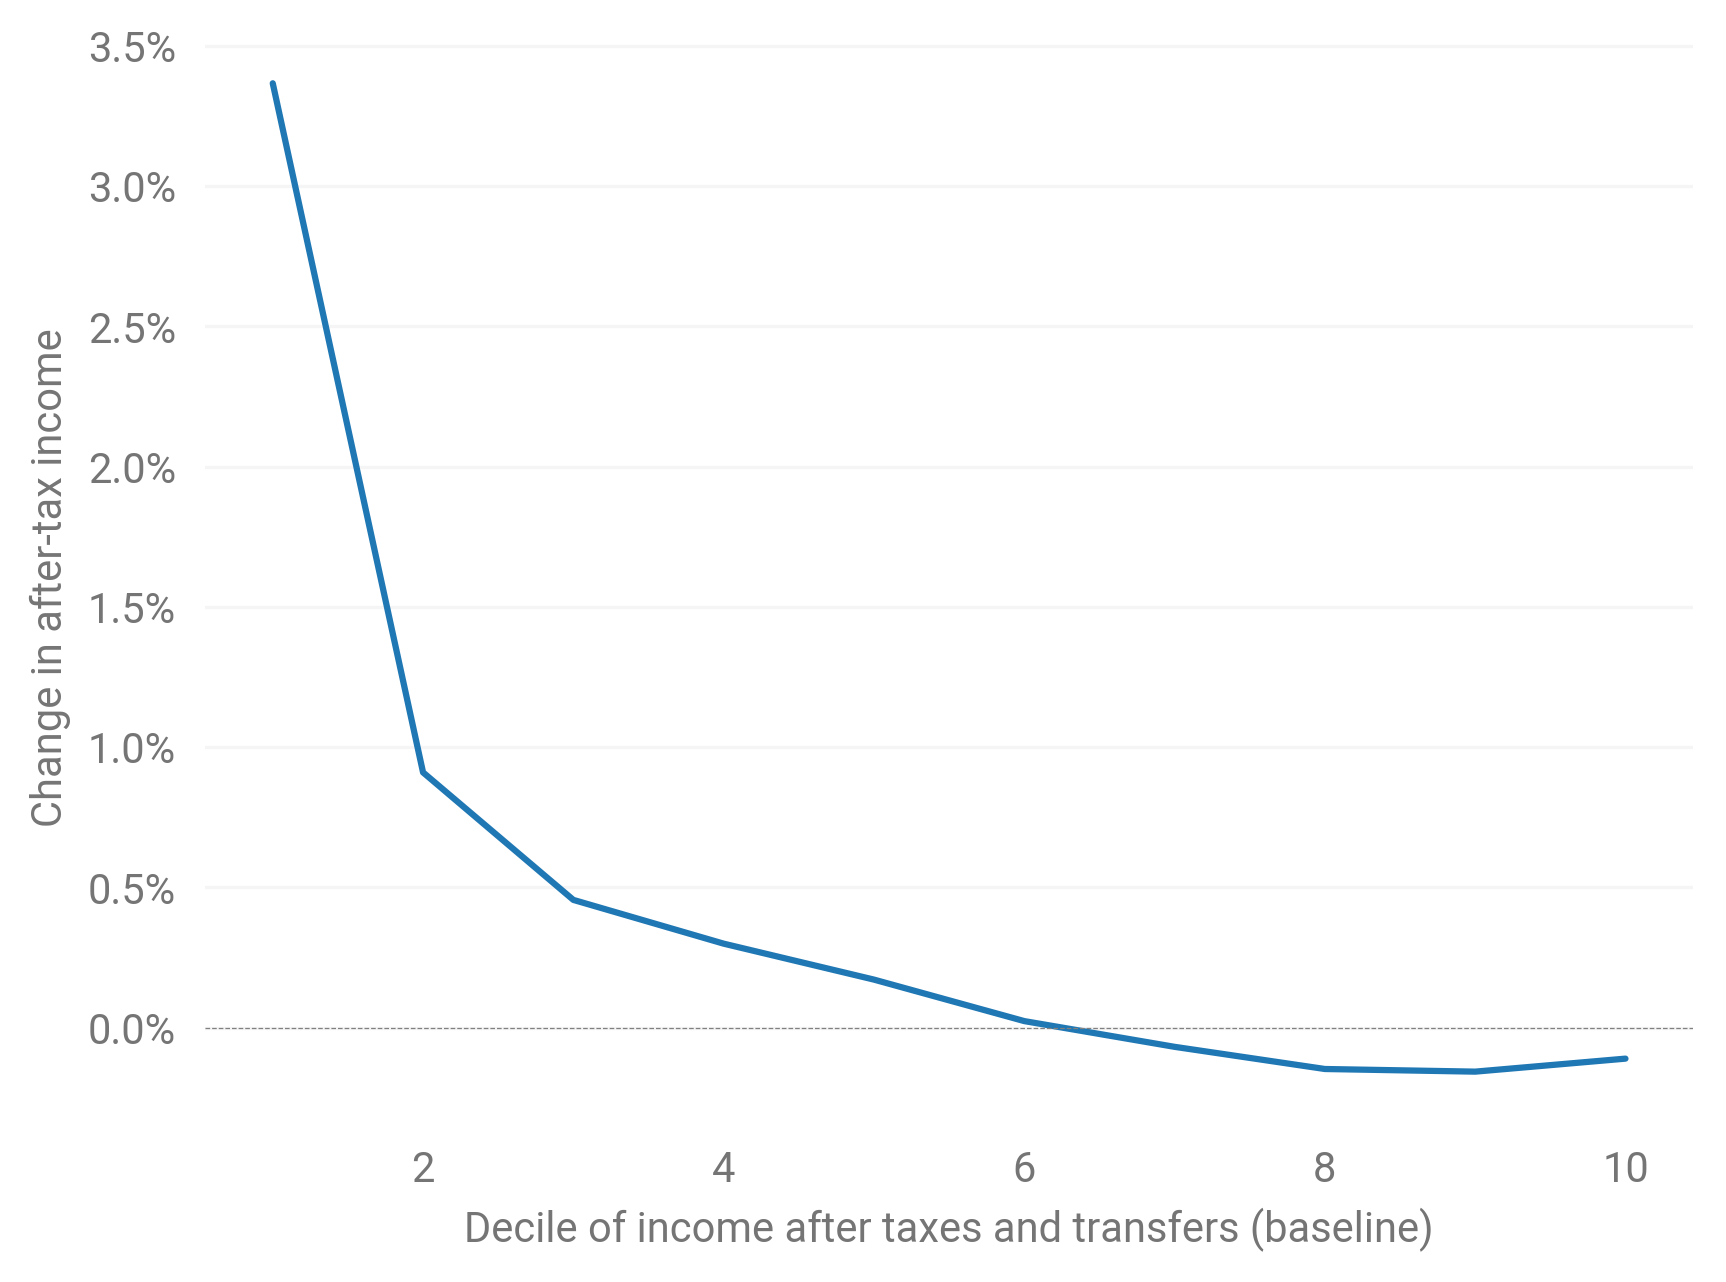

In [101]:
ax = diff1.afti_pct_diff.plot()
sns.despine(left=True, bottom=True)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.1%}'.format(y)))
ax.grid(color='#f5f5f5', axis='y')
plt.axhline(y=0, c='gray', linestyle='dashed', linewidth=0.3)
ax.set(xlabel=
       'Decile of income after taxes and transfers (baseline)',
       ylabel='Change in after-tax income')
plt.title('UBI reform ')

In [80]:
df1.afti_ubi_m.sum()

10451984.854785077

In [81]:
df1.aftertax_income_m.sum()

10451984.854785077

In [47]:
(base.aftertax_income_m.sum() - ubi6.aftertax_income_m.sum()) / base.XTOT_m.sum()

4530.97323429576

Zero out negative after-tax incomes.

In [8]:
df.aftertax_income.clip_lower(0, inplace=True)
df.aftertax_income_m.clip_lower(0, inplace=True)

Add after-tax income per person.

In [9]:
df['afti_pp'] = df.aftertax_income / df.XTOT